# ABOUT THE DATASET(SALES DATA)


In [395]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [396]:
#READING CSV FILE
data=pd.read_csv('sales_data.csv', header= 0,
                        encoding= 'unicode_escape')

In [397]:
#TO DISPLAY ALL THE COLUMNS
pd.set_option('display.max_columns', None)

In [398]:
#DISPLAYING DATA FOR FIRST 5 ROWS
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [399]:
#DISPLAYING NAME OF ALL THE COLUMNS IN THE DATASET
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [400]:
#RENAMING COLUMNS
data.rename(columns={'QUANTITYORDERED':'QUANTITY','PRICEEACH':'PRICE','ORDERDATE':'DATE','QTR_ID':'QTR','MONTH_ID':'MONTH','YEAR_ID':'YEAR','CONTACTLASTNAME':'LAST_NAME','CONTACTFIRSTNAME':'FIRST_NAME'},inplace=True)

In [401]:
#DISPLAYING DATA WITH NEW COLUMN NAME
data.head()

,ORDERNUMBER,QUANTITY,PRICE,ORDERLINENUMBER,SALES,DATE,STATUS,QTR,MONTH,YEAR,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,LAST_NAME,FIRST_NAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [402]:
#GENERATING DIMENSIONS OF DATASET
data.shape

(2823, 25)

In [403]:
#DISPLAYING THE ROWS AND COLUMNS OF DATASET
print('There are {0} rows and {1} columns in data'.format(data.shape[0],data.shape[1]))

There are 2823 rows and 25 columns in data


In [404]:
#DISPLAYING THE DATATYPES OF ALL THE COLUMNS
data.dtypes

ORDERNUMBER          int64
QUANTITY             int64
PRICE              float64
ORDERLINENUMBER      int64
SALES              float64
DATE                object
STATUS              object
QTR                  int64
MONTH                int64
YEAR                 int64
PRODUCTLINE         object
MSRP                 int64
PRODUCTCODE         object
CUSTOMERNAME        object
PHONE               object
ADDRESSLINE1        object
ADDRESSLINE2        object
CITY                object
STATE               object
POSTALCODE          object
COUNTRY             object
TERRITORY           object
LAST_NAME           object
FIRST_NAME          object
DEALSIZE            object
dtype: object

In [405]:
#CONVERTING THE DATA TYPE OF DATE FROM OBJECT TO DATETIME
data['DATE']=pd.to_datetime(data['DATE'])

In [406]:
#DISPLAYING THE CORRECT DATA TYPES OF ALL THE COLUMNS AFTER MODIFICATION
data.dtypes

ORDERNUMBER                 int64
QUANTITY                    int64
PRICE                     float64
ORDERLINENUMBER             int64
SALES                     float64
DATE               datetime64[ns]
STATUS                     object
QTR                         int64
MONTH                       int64
YEAR                        int64
PRODUCTLINE                object
MSRP                        int64
PRODUCTCODE                object
CUSTOMERNAME               object
PHONE                      object
ADDRESSLINE1               object
ADDRESSLINE2               object
CITY                       object
STATE                      object
POSTALCODE                 object
COUNTRY                    object
TERRITORY                  object
LAST_NAME                  object
FIRST_NAME                 object
DEALSIZE                   object
dtype: object

In [407]:
#CHECKING NUMBER OF DUPLICATE ROWS IN DATASET
data.duplicated().sum()

0

In [408]:
#PRINTITNG NUMBER OF DUPLICATE ROWS IN DATASET
print('There are {0} duplicates in data'.format(data.duplicated().sum()))

There are 0 duplicates in data


In [409]:
#CHECKING NULL VALUES PRESENT IN THE COLUMNS
data.isnull().sum()

ORDERNUMBER           0
QUANTITY              0
PRICE                 0
ORDERLINENUMBER       0
SALES                 0
DATE                  0
STATUS                0
QTR                   0
MONTH                 0
YEAR                  0
PRODUCTLINE           0
MSRP                  0
PRODUCTCODE           0
CUSTOMERNAME          0
PHONE                 0
ADDRESSLINE1          0
ADDRESSLINE2       2521
CITY                  0
STATE              1486
POSTALCODE           76
COUNTRY               0
TERRITORY          1074
LAST_NAME             0
FIRST_NAME            0
DEALSIZE              0
dtype: int64

<AxesSubplot:>

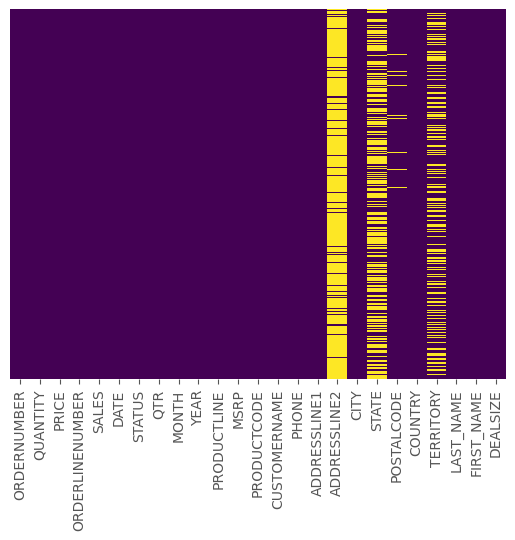

In [410]:
#VISUALING NULL VALUES OF THE COLUMNS USING HEATMAP
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [411]:
#DROPPING UNNECESSARY COLUMNS AND COLUMNS CONTAINING NULL VALUES
data=data.drop(['PHONE','STATE','TERRITORY','POSTALCODE','ADDRESSLINE1','ADDRESSLINE2'],axis=1)

In [412]:
#RECHECKING THE NULL VALUES PRESENT IN THE COLUMNS
data.isnull().sum()

ORDERNUMBER        0
QUANTITY           0
PRICE              0
ORDERLINENUMBER    0
SALES              0
DATE               0
STATUS             0
QTR                0
MONTH              0
YEAR               0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
CUSTOMERNAME       0
CITY               0
COUNTRY            0
LAST_NAME          0
FIRST_NAME         0
DEALSIZE           0
dtype: int64

In [413]:
#PRINTING THE NUMBER OF NULL VALUES IN THE DATASET
print('There are 0 null values in data')

There are 0 null values in data


<AxesSubplot:>

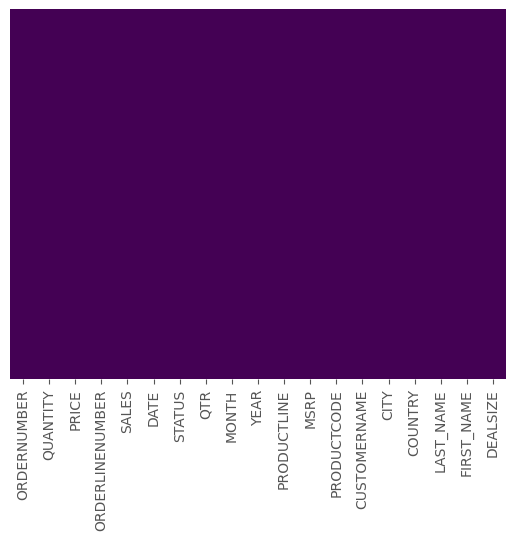

In [414]:
#VISUALISING THE NULL VALUES USING HEATMAP AFTER DROPPING FEW COLUMNS
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [415]:
#DISPLAYING THE NUMBER OF UNIQUES VALUES PRESENT IN COLUMNS OF THE DATASET
data.nunique()

ORDERNUMBER         307
QUANTITY             58
PRICE              1016
ORDERLINENUMBER      18
SALES              2763
DATE                252
STATUS                6
QTR                   4
MONTH                12
YEAR                  3
PRODUCTLINE           7
MSRP                 80
PRODUCTCODE         109
CUSTOMERNAME         92
CITY                 73
COUNTRY              19
LAST_NAME            77
FIRST_NAME           72
DEALSIZE              3
dtype: int64

In [416]:
#PRINTING IMPORTANT INFORMATION RELATED TO THE DATASET
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ORDERNUMBER      2823 non-null   int64         
 1   QUANTITY         2823 non-null   int64         
 2   PRICE            2823 non-null   float64       
 3   ORDERLINENUMBER  2823 non-null   int64         
 4   SALES            2823 non-null   float64       
 5   DATE             2823 non-null   datetime64[ns]
 6   STATUS           2823 non-null   object        
 7   QTR              2823 non-null   int64         
 8   MONTH            2823 non-null   int64         
 9   YEAR             2823 non-null   int64         
 10  PRODUCTLINE      2823 non-null   object        
 11  MSRP             2823 non-null   int64         
 12  PRODUCTCODE      2823 non-null   object        
 13  CUSTOMERNAME     2823 non-null   object        
 14  CITY             2823 non-null   object 

In [417]:
#DISPLAYING FIRST FIVE ROWS OF DATASET AFTER DATA EXPLORATION
data.head()

,ORDERNUMBER,QUANTITY,PRICE,ORDERLINENUMBER,SALES,DATE,STATUS,QTR,MONTH,YEAR,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,LAST_NAME,FIRST_NAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,NYC,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,Reims,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,Paris,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,Pasadena,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,USA,Brown,Julie,Medium


In [418]:
#DISPLAYING LAST FIVE ROWS OF THE DATASET AFTER DATA EXPLORATION
data.tail()

,ORDERNUMBER,QUANTITY,PRICE,ORDERLINENUMBER,SALES,DATE,STATUS,QTR,MONTH,YEAR,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,LAST_NAME,FIRST_NAME,DEALSIZE
2818,10350,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,Madrid,Spain,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",Oulu,Finland,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,Madrid,Spain,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,Toulouse,France,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,2005-05-06,On Hold,2,5,2005,Ships,54,S72_3212,Gifts4AllAges.com,Boston,USA,Yoshido,Juri,Medium


In [419]:
#DISPLAYING STATISTICAL DESCRIPTION OF THE QUANTITATIVE VARIABLES OF DATASET
quant_variables=['QUANTITY','PRICE','SALES','MSRP']
data[quant_variables].describe()

,QUANTITY,PRICE,SALES,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000
mean,35.092809,83.658544,3553.889072,100.715551
std,9.741443,20.174277,1841.865106,40.187912
min,6.000000,26.880000,482.130000,33.000000
25%,27.000000,68.860000,2203.430000,68.000000
50%,35.000000,95.700000,3184.800000,99.000000
75%,43.000000,100.000000,4508.000000,124.000000
max,97.000000,100.000000,14082.800000,214.000000


It is obsereved that there are no negative values for quantitative variables which is good sign.

In [420]:
#CALCULATING CORRELATION BETWEEN THE QUANTITATIVE VARIABLES OF DATASET
correlation=data[quant_variables].corr()

In [421]:
#PRINTING THE CORRELATION VALUES
correlation

,QUANTITY,PRICE,SALES,MSRP
QUANTITY,1.000000,0.005564,0.551426,0.017881
PRICE,0.005564,1.000000,0.657841,0.670625
SALES,0.551426,0.657841,1.000000,0.635239
MSRP,0.017881,0.670625,0.635239,1.000000


From correlation values we can conclude that:
    1.)Sales is correlated with quantity and Price
    2.)MSRP and PRICE does not differ much

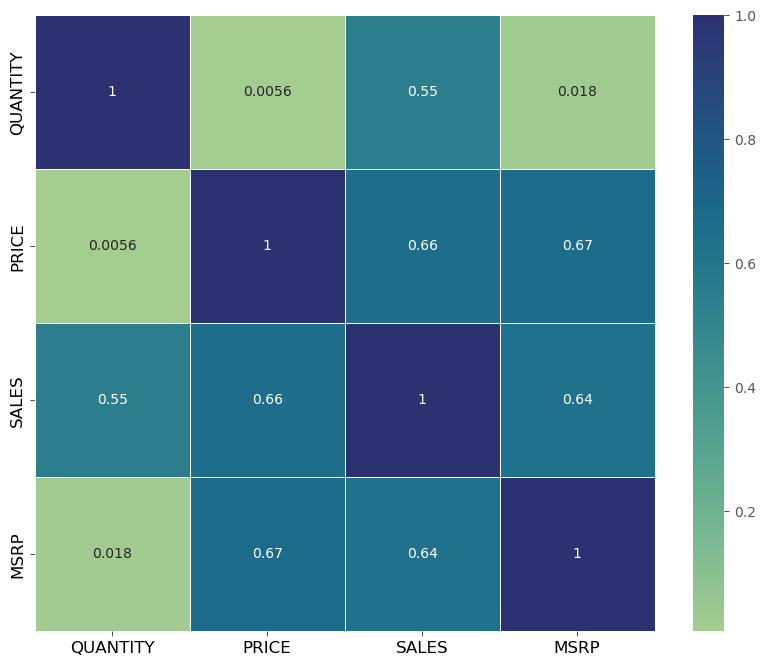

In [422]:
#VISUALISING CORRELATION VALUES USING HEATMAP
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,linewidth=.5,cmap='crest')
plt.xticks(color='BLACK',fontsize=12)
plt.yticks(color='BLACK',fontsize=12)
plt.show()

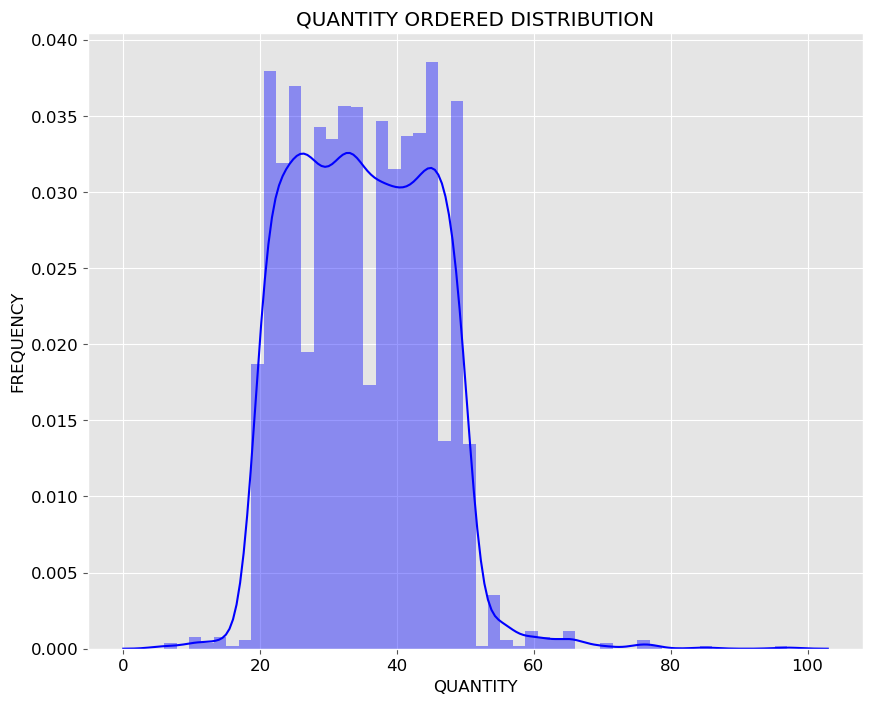

In [423]:
#VISUALISING QUANTITY ORDERED USING DISTRIBUTION PLOT
plt.figure(figsize=(10,8))
sns.distplot(data['QUANTITY'],color='BLUE',bins=50)
plt.title('QUANTITY ORDERED DISTRIBUTION',color='BLACK')
plt.xlabel('QUANTITY',color='BLACK')
plt.ylabel('FREQUENCY',color='BLACK')
plt.xticks(color='BLACK',fontsize=12)
plt.yticks(color='BLACK',fontsize=12)
plt.show()

From Quantity Ordered Distribution we can infer that most of the order quantity is between 20-50 which can categorised as bulk orders

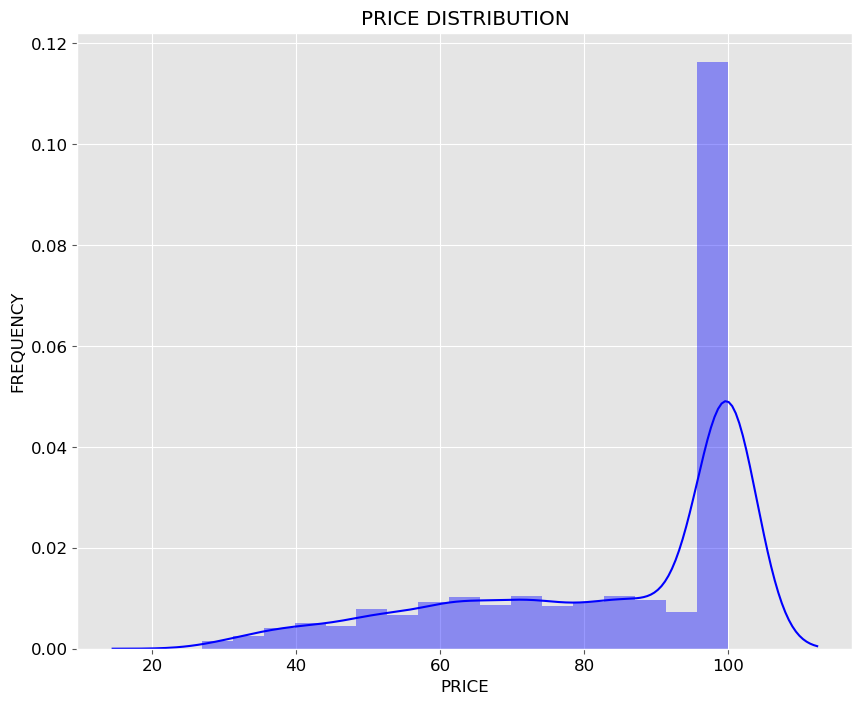

In [424]:
#VISUALISING PRICE DISTRIBUTION USING DISTRIBUTION PLOT
plt.figure(figsize=(10,8))
sns.distplot(data['PRICE'],color='BLUE')
plt.title('PRICE DISTRIBUTION',color='BLACK')
plt.xlabel('PRICE',color='BLACK')
plt.ylabel('FREQUENCY',color='BLACK')
plt.xticks(color='BLACK',fontsize=12)
plt.yticks(color='BLACK',fontsize=12)
plt.show()

Price Distribution is left skewed with highest price as 100$

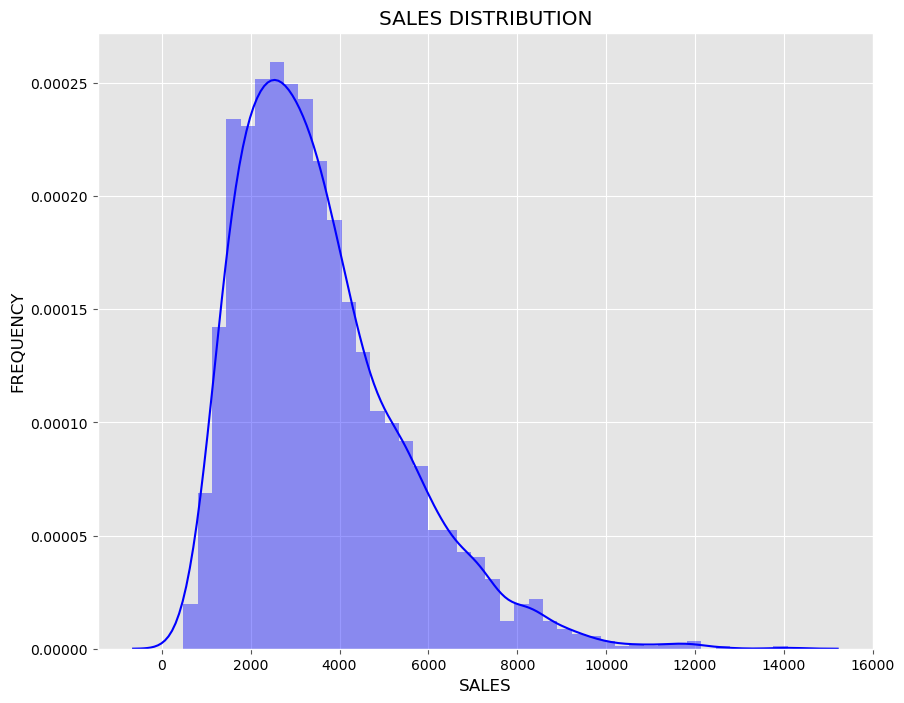

In [425]:
#VISUALISING SALES DISTRIBUTION USING DISTRIBUTION PLOT
plt.figure(figsize=(10,8))
sns.distplot(data['SALES'],color='Blue')
plt.title('SALES DISTRIBUTION',color='BLACK')
plt.xlabel('SALES',color='BLACK')
plt.ylabel('FREQUENCY',color='BLACK')
plt.xticks(color='BLACK')
plt.yticks(color='BLACK')
plt.show()

From Sales Distribution we can infer that mostly sales are between 1000-5000 dollar which is a good sign and can we investigated further.

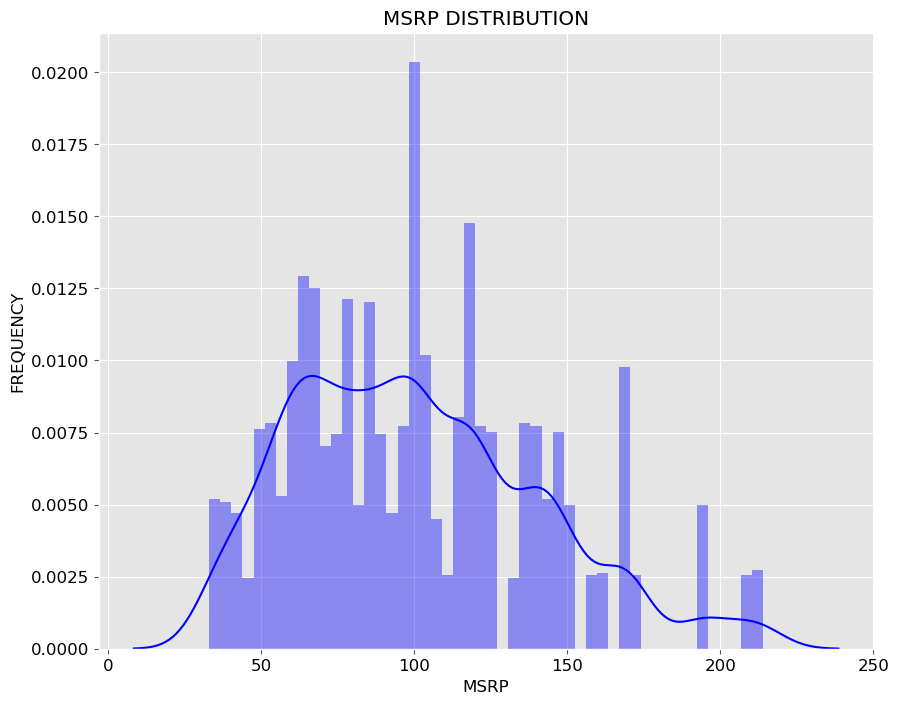

In [426]:
#VISUALISING MSRP(MANUFACTURER SUGGESTED RETAIL PRICE) DISTRIBUTION USING DISTRIBUTION PLOT
plt.figure(figsize=(10,8))
sns.distplot(data['MSRP'],color='BLUE',bins=50)
plt.title('MSRP DISTRIBUTION',color='BLACK')
plt.xlabel('MSRP',color='BLACK')
plt.ylabel('FREQUENCY',color='BLACK')
plt.xticks(color='BLACK',fontsize=12)
plt.yticks(color='BLACK',fontsize=12)
plt.show()

In [427]:
dealsize_count=data.groupby('DEALSIZE').agg({'ORDERNUMBER':'count'}).rename(columns={'ORDERNUMBER':'COUNT'}).sort_values(by='COUNT',ascending=False).reset_index()
dealsize_count

,DEALSIZE,COUNT
0,Medium,1384
1,Small,1282
2,Large,157


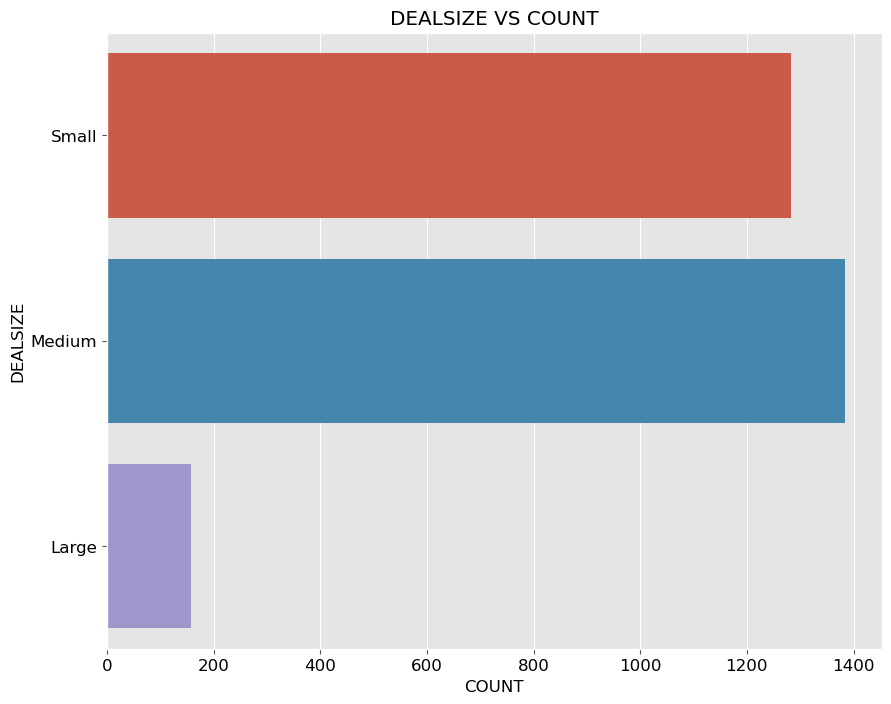

In [428]:
#VISUALISING DEALSIZE DISTRIBUTION USING COUNT PLOT
plt.figure(figsize=(10,8))
sns.countplot(y='DEALSIZE',data=data)
plt.xlabel('COUNT',color='BLACK')
plt.ylabel('DEALSIZE',color='BLACK')
plt.title('DEALSIZE VS COUNT',color='BLACK')
plt.xticks(color='BLACK',fontsize=12)
plt.yticks(color='BLACK',fontsize=12)
plt.show()

   From dealsize plot we can infer that medium is more than small which is good sign in terms of sales and revenue generated

In [429]:
countries_count=data.groupby('COUNTRY').agg({'ORDERNUMBER':'count'}).rename(columns={'ORDERNUMBER':'COUNT'}).sort_values(by='COUNT',ascending=False).reset_index()
countries_count

,COUNTRY,COUNT
0,USA,1004
1,Spain,342
2,France,314
3,Australia,185
4,UK,144
5,Italy,113
6,Finland,92
7,Norway,85
8,Singapore,79
9,Canada,70


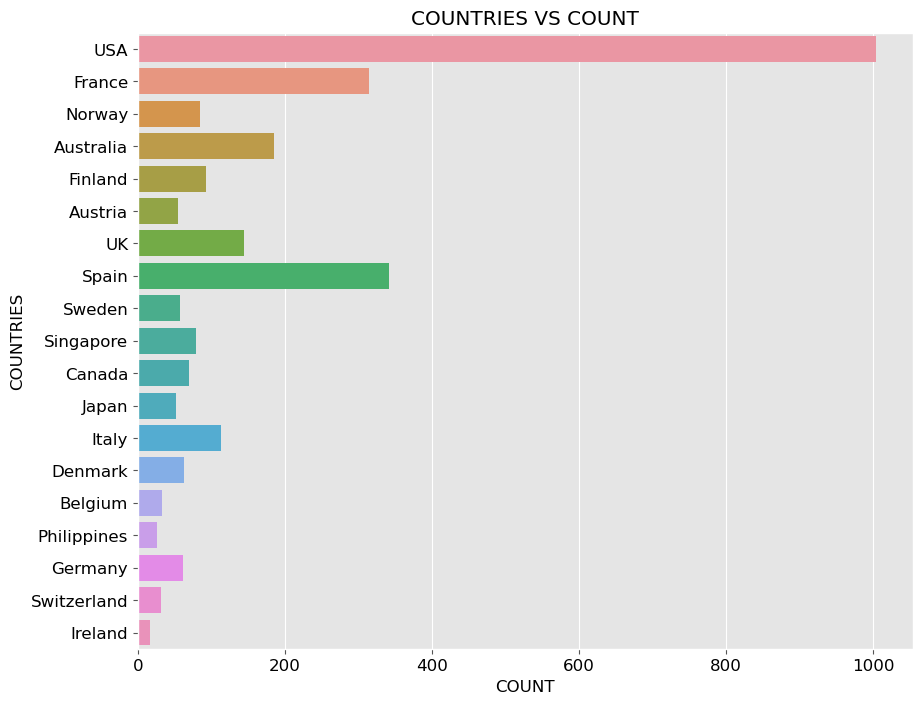

In [430]:
#COUNT PLOT FOR DIFFERENT COUNTRIES
plt.figure(figsize=(10,8))
sns.countplot(y='COUNTRY',data=data)
plt.xlabel('COUNT',color='BLACK')
plt.ylabel('COUNTRIES',color='BLACK')
plt.title('COUNTRIES VS COUNT',color='BLACK')
plt.xticks(color='BLACK',fontsize=12)
plt.yticks(color='BLACK',fontsize=12)
plt.show()

From countries plot we get to know that majority of the customer are from USA.

In [431]:
city_count=data.groupby('CITY').agg({'ORDERNUMBER':'count'}).rename(columns={'ORDERNUMBER':'COUNT'}).sort_values(by='COUNT',ascending=False).reset_index()
city_count

,CITY,COUNT
0,Madrid,304
1,San Rafael,180
2,NYC,152
3,Singapore,79
4,Paris,70
...,...,...
68,Graz,15
69,Munich,14
70,Los Angeles,14
71,Burbank,13


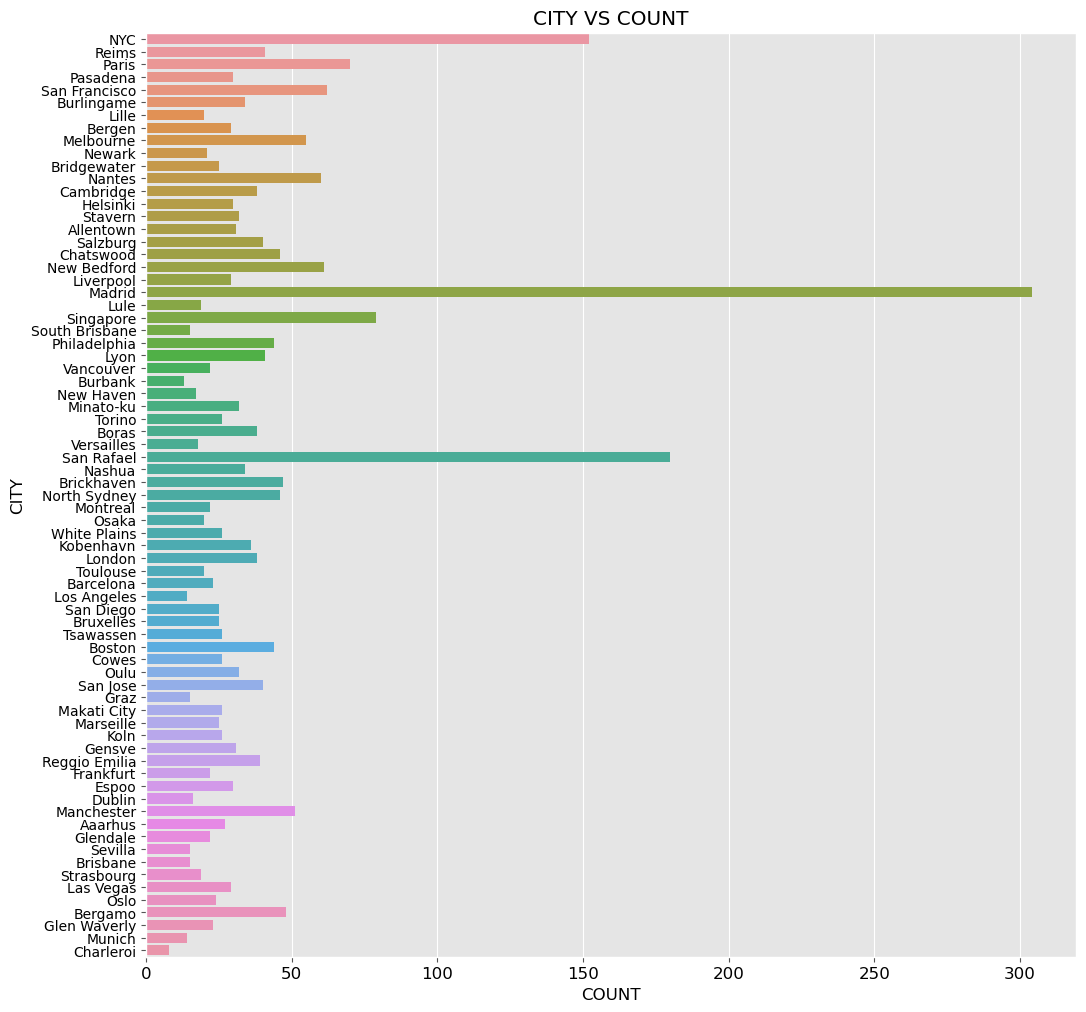

In [432]:
#COUNT PLOT FOR DIFFERENT CITY
plt.figure(figsize=(12,12))
sns.countplot(y='CITY',data=data)
plt.xlabel('COUNT',color='BLACK')
plt.ylabel('CITY',color='BLACK')
plt.title('CITY VS COUNT',color='BLACK')
plt.xticks(color='BLACK',fontsize=12)
plt.yticks(color='BLACK')
plt.show()

From countries plot we get to know that majority of the customer are from MADRID.

In [433]:
productcode_count=data.groupby('PRODUCTCODE').agg({'ORDERNUMBER':'count'}).rename(columns={'ORDERNUMBER':'COUNT'}).sort_values(by='COUNT',ascending=False).reset_index()
productcode_count

,PRODUCTCODE,COUNT
0,S18_3232,52
1,S10_1949,28
2,S24_1444,28
3,S10_4962,28
4,S24_2840,28
...,...,...
104,S18_1749,22
105,S24_2887,22
106,S24_3969,22
107,S18_4409,22


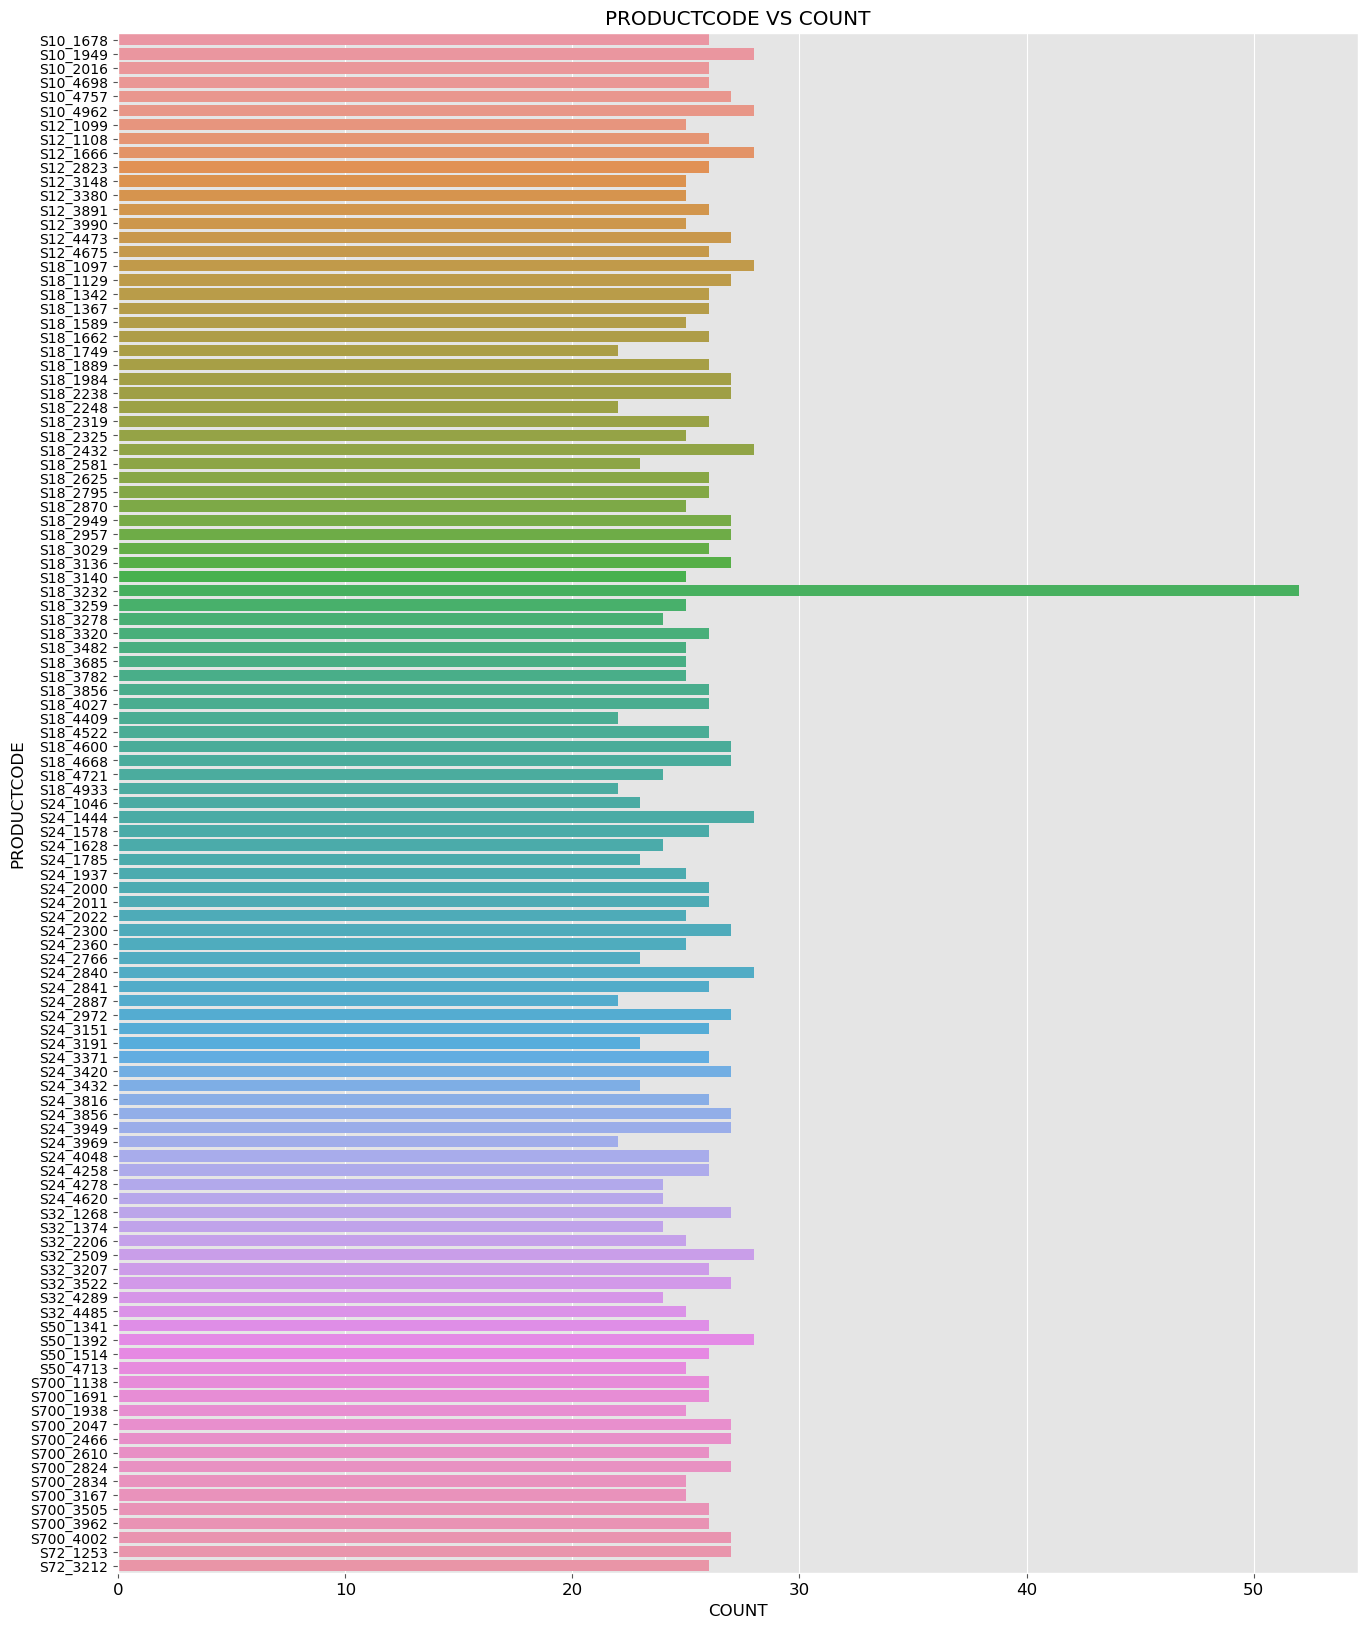

In [434]:
#COUNT PLOT FOR PRODUCTS PRODUCT CODE
plt.figure(figsize=(16,20))
sns.countplot(y='PRODUCTCODE',data=data)
plt.xlabel('COUNT',color='BLACK')
plt.ylabel('PRODUCTCODE',color='BLACK')
plt.title('PRODUCTCODE VS COUNT',color='BLACK')
plt.xticks(color='BLACK',fontsize=12)
plt.yticks(color='BLACK')
plt.show()

From productcode plot we get to know that product code of most sold item is S18_3232.

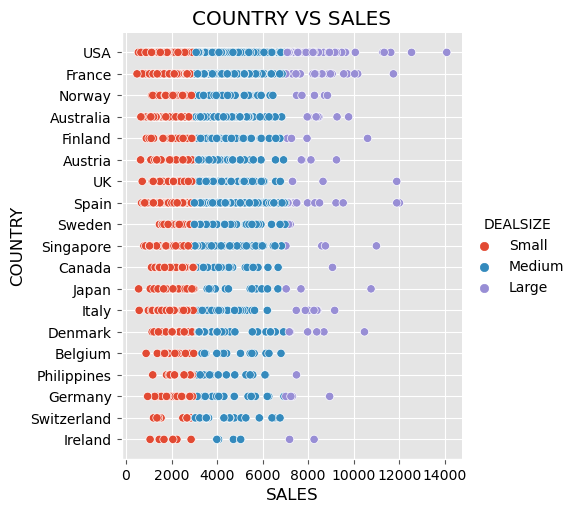

In [435]:
#RELATION PLOT BETWEEN CCOUNTRIES AND SALES WITH DIFFERENTIATING FACTOR AS DEALSIZE
sns.relplot(x='SALES',y='COUNTRY',data=data,color='BLUE',hue='DEALSIZE')
plt.xlabel('SALES',color='BLACK')
plt.ylabel('COUNTRY',color='BLACK')
plt.title('COUNTRY VS SALES',color='BLACK')
plt.xticks(color='BLACK',fontsize=10)
plt.yticks(color='BLACK')
plt.show()

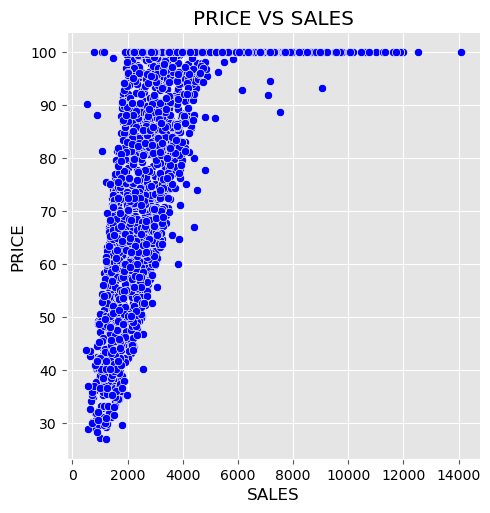

In [436]:
#RELATION  PLOT FOR PRICE AND SALES
sns.relplot(x='SALES',y='PRICE',data=data,color='BLUE')
plt.xlabel('SALES',color='BLACK')
plt.ylabel('PRICE',color='BLACK')
plt.title('PRICE VS SALES',color='BLACK')
plt.xticks(color='BLACK',fontsize=10)
plt.yticks(color='BLACK')
plt.show()

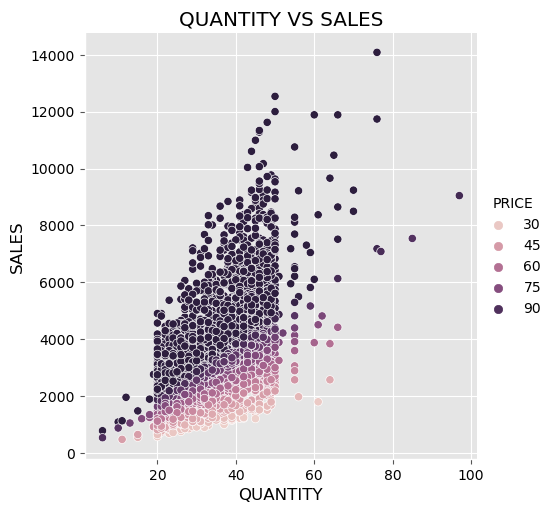

In [437]:
#RELATION PLOT FOR QUANTITY AND SALES WITH DIFFERENTIATING FACTOR AS PRICE
sns.relplot(x='QUANTITY',y='SALES',data=data,color='BLUE',hue='PRICE')
plt.xlabel('QUANTITY',color='BLACK')
plt.ylabel('SALES',color='BLACK')
plt.title('QUANTITY VS SALES',color='BLACK')
plt.xticks(color='BLACK',fontsize=10)
plt.yticks(color='BLACK')
plt.show()

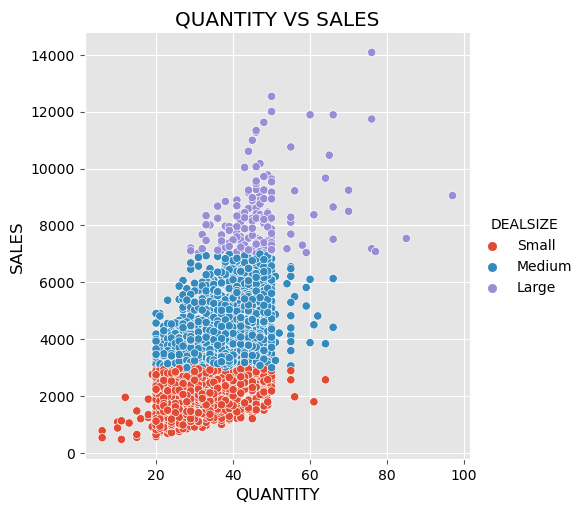

In [438]:
#RELATION PLOT BETWEEN QUANTITY AND SALES WITH DIFFERENTIATING FACTOR AS DEALSIZE
sns.relplot(x='QUANTITY',y='SALES',data=data,color='BLUE',hue='DEALSIZE')
plt.xlabel('QUANTITY',color='BLACK')
plt.ylabel('SALES',color='BLACK')
plt.title('QUANTITY VS SALES',color='BLACK')
plt.xticks(color='BLACK',fontsize=10)
plt.yticks(color='BLACK')
plt.show()

In [439]:
#FINDING TOP COUNTRIES IN COMPARISION TO TOTAL SALES
top_countries=data.groupby('COUNTRY')['SALES'].sum().to_frame('TOTAL_SALES').reset_index().sort_values(by='TOTAL_SALES',ascending=False)

In [440]:
#CONVERTING SALES UNIT TO MILLION 
top_countries['TOTAL_SALES']=top_countries['TOTAL_SALES']/1000000
top_countries.rename(columns={'TOTAL_SALES':'TOTAL_SALES(M)'})
top_countries

,COUNTRY,TOTAL_SALES
18,USA,3.627983
14,Spain,1.215687
6,France,1.110917
0,Australia,0.630623
17,UK,0.478880
9,Italy,0.374674
5,Finland,0.329582
11,Norway,0.307464
13,Singapore,0.288488
4,Denmark,0.245637


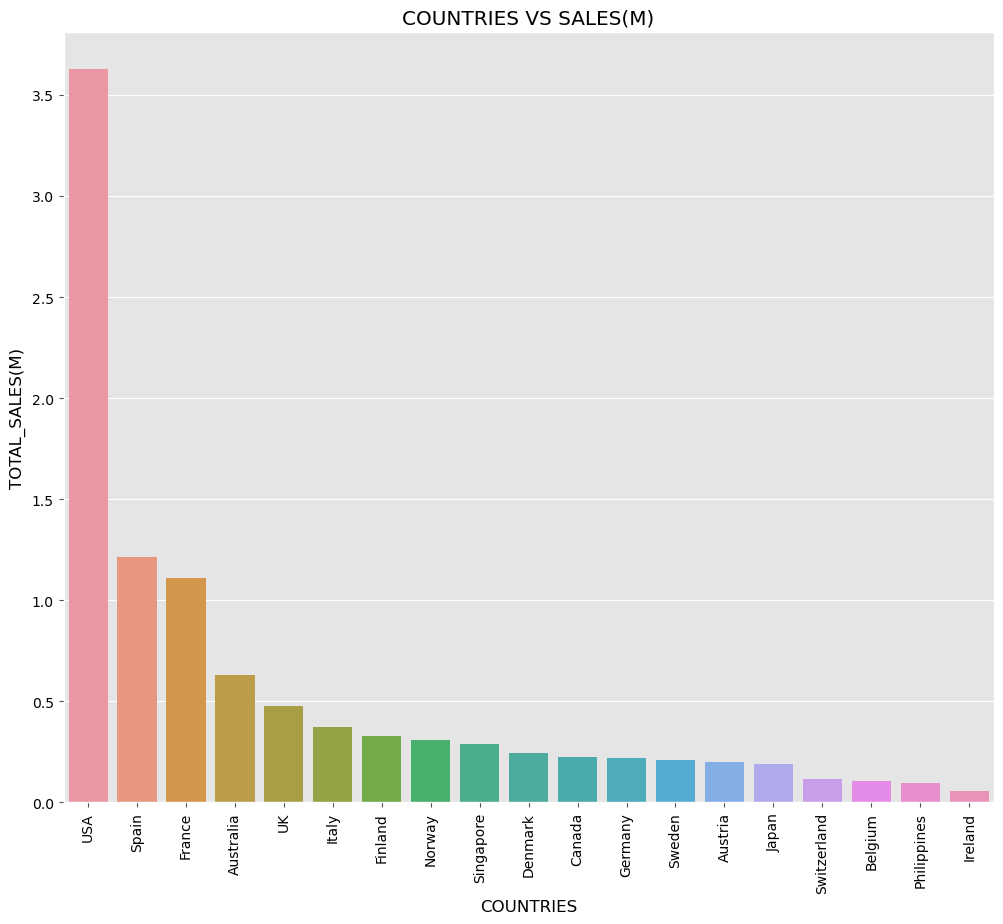

In [441]:
#VISUALISING COUNTRIES VS TOTAL SALES USING BARPLOT
plt.figure(figsize=(12,10))
sns.barplot(x='COUNTRY',y='TOTAL_SALES',data=top_countries)
plt.xlabel('COUNTRIES',color='BLACK')
plt.ylabel('TOTAL_SALES(M)',color='BLACK')
plt.title('COUNTRIES VS SALES(M)',color='BLACK')
plt.xticks(color='BLACK',fontsize=10,rotation=90)
plt.yticks(color='BLACK')
plt.show()

From Sales VS Countries plot we infer that highest sales is obtained country is USA

In [442]:
#CALCULATING TOP PRODUCTCODE OF DIFFERENT PRODUCTS
top_products=data.groupby('PRODUCTCODE')['SALES'].sum().to_frame('TOTAL_SALES').reset_index().sort_values(by='TOTAL_SALES',ascending=False)

In [443]:
top_products=top_products.head(10)

In [444]:
#DISPLAYING TOP 10 PRODUCTS IN COMPARISION TO TOTAL SALES
top_products

,PRODUCTCODE,TOTAL_SALES
39,S18_3232,288245.42
1,S10_1949,191073.03
3,S10_4698,170401.07
7,S12_1108,168585.32
25,S18_2238,154623.95
12,S12_3891,145332.04
76,S24_3856,140626.90
9,S12_2823,140006.16
21,S18_1662,139421.97
6,S12_1099,137177.01


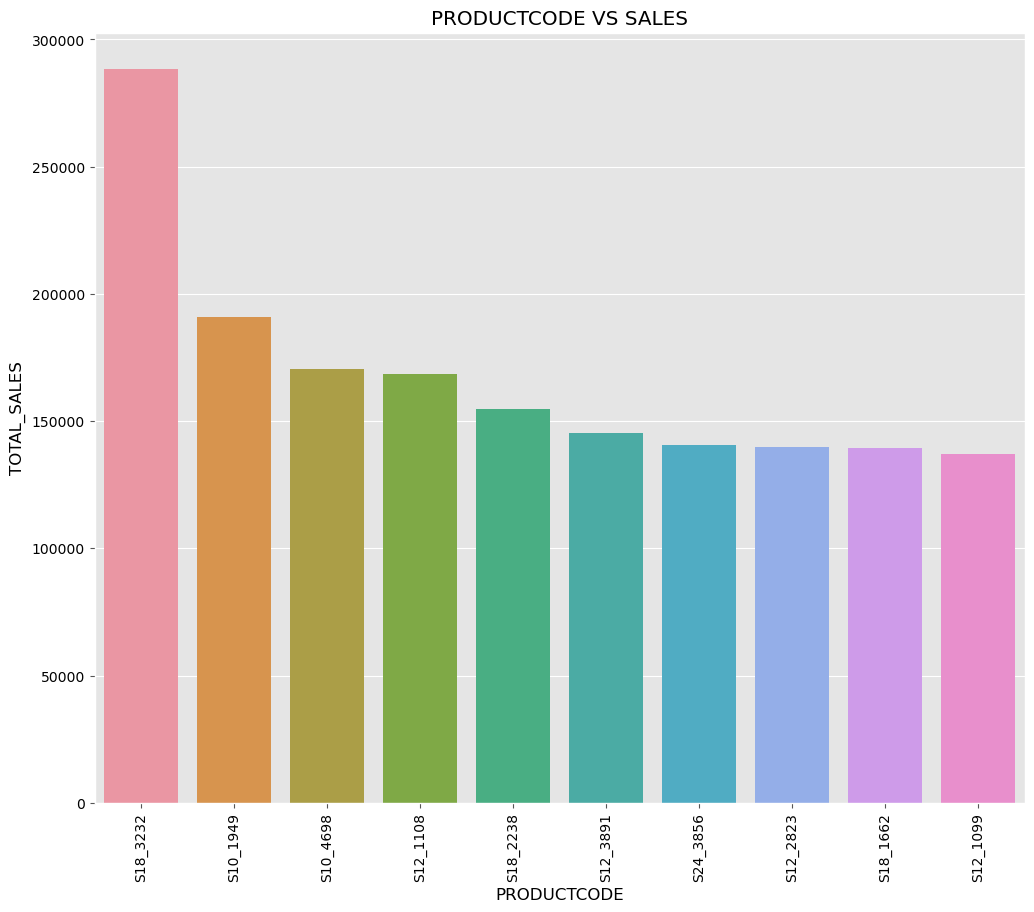

In [445]:
#VISUALISING TOP 10 PRODUCTS USING BARPLOT
plt.figure(figsize=(12,10))
sns.barplot(x='PRODUCTCODE',y='TOTAL_SALES',data=top_products)
plt.xlabel('PRODUCTCODE',color='BLACK')
plt.ylabel('TOTAL_SALES',color='BLACK')
plt.title('PRODUCTCODE VS SALES',color='BLACK')
plt.xticks(color='BLACK',fontsize=10,rotation=90)
plt.yticks(color='BLACK')
plt.show()

From Productcode vs Sales plot we infer that product with highest sales is S18_3232

In [446]:
#DISPLAYING UNIQUE PRODUCT CATEGORY
data['PRODUCTLINE'].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [447]:
#CALCULATING TOTAL SALES FOR DIFFERENT PRODUCT CATEGORIES
top_productline=data.groupby('PRODUCTLINE')['SALES'].sum().to_frame('TOTAL_SALES').reset_index().sort_values(by='TOTAL_SALES',ascending=False)

In [448]:
#DISPLAYING PRODUCT CATEGORY WITH TOTAL SALES
top_productline

,PRODUCTLINE,TOTAL_SALES
0,Classic Cars,3919615.66
6,Vintage Cars,1903150.84
1,Motorcycles,1166388.34
5,Trucks and Buses,1127789.84
2,Planes,975003.57
3,Ships,714437.13
4,Trains,226243.47


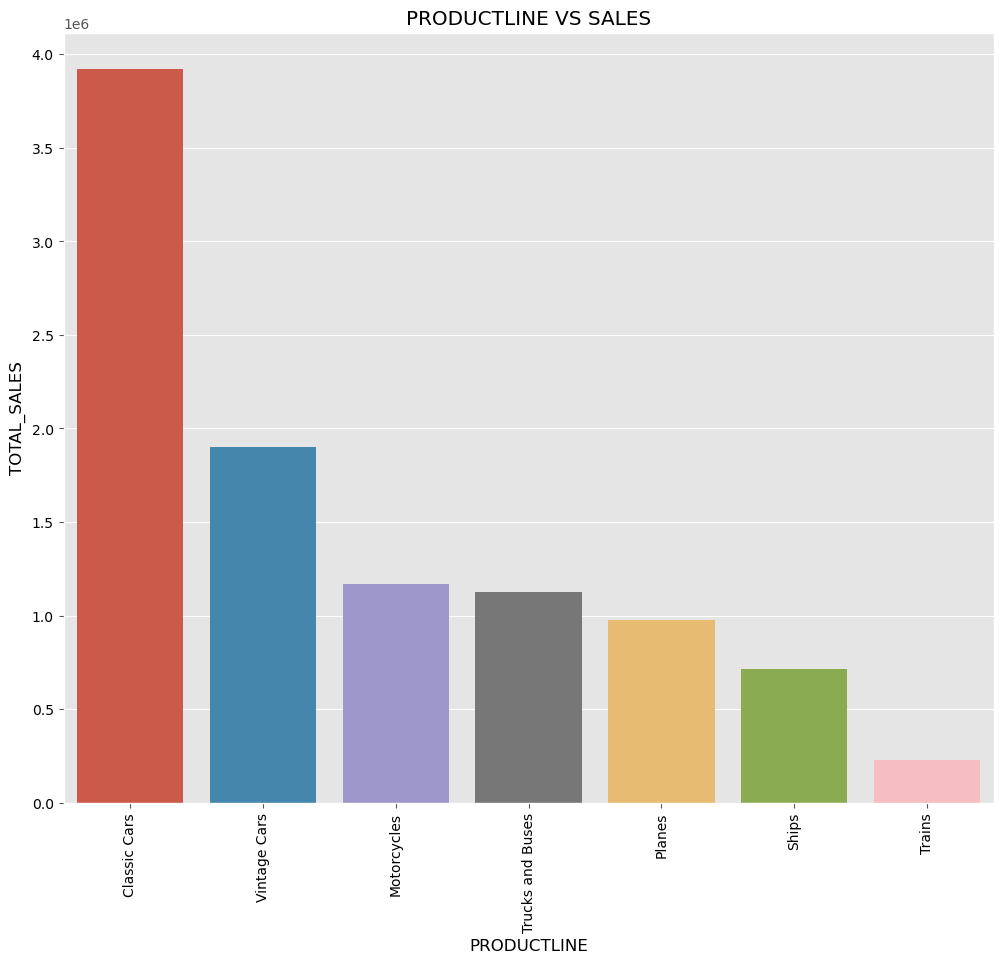

In [449]:
#VISUALISING DIFFERENT PRODUCT CATEGORY WITH TOTAL SALES USING BARPLOT
plt.figure(figsize=(12,10))
sns.barplot(x='PRODUCTLINE',y='TOTAL_SALES',data=top_productline)
plt.xlabel('PRODUCTLINE',color='BLACK')
plt.ylabel('TOTAL_SALES',color='BLACK')
plt.title('PRODUCTLINE VS SALES',color='BLACK')
plt.xticks(color='BLACK',fontsize=10,rotation=90)
plt.yticks(color='BLACK')
plt.show()

From Productline vs Sales plot we infer that Classic Cars has highest sales as compared to other categories of product

In [450]:
#CALCULATING TOTAL QUANTITY FOR DIFFERENT PRODUCT CATEGORY
top_productline_quantity=data.groupby('PRODUCTLINE')['QUANTITY'].sum().to_frame('TOTAL_QUANTITY').reset_index().sort_values(by='TOTAL_QUANTITY',ascending=False)

In [451]:
#DISPLAYING TOTAL QUANTITY OF DIFFERENT PRODUCT CATEGORY
top_productline_quantity

,PRODUCTLINE,TOTAL_QUANTITY
0,Classic Cars,33992
6,Vintage Cars,21069
1,Motorcycles,11663
5,Trucks and Buses,10777
2,Planes,10727
3,Ships,8127
4,Trains,2712


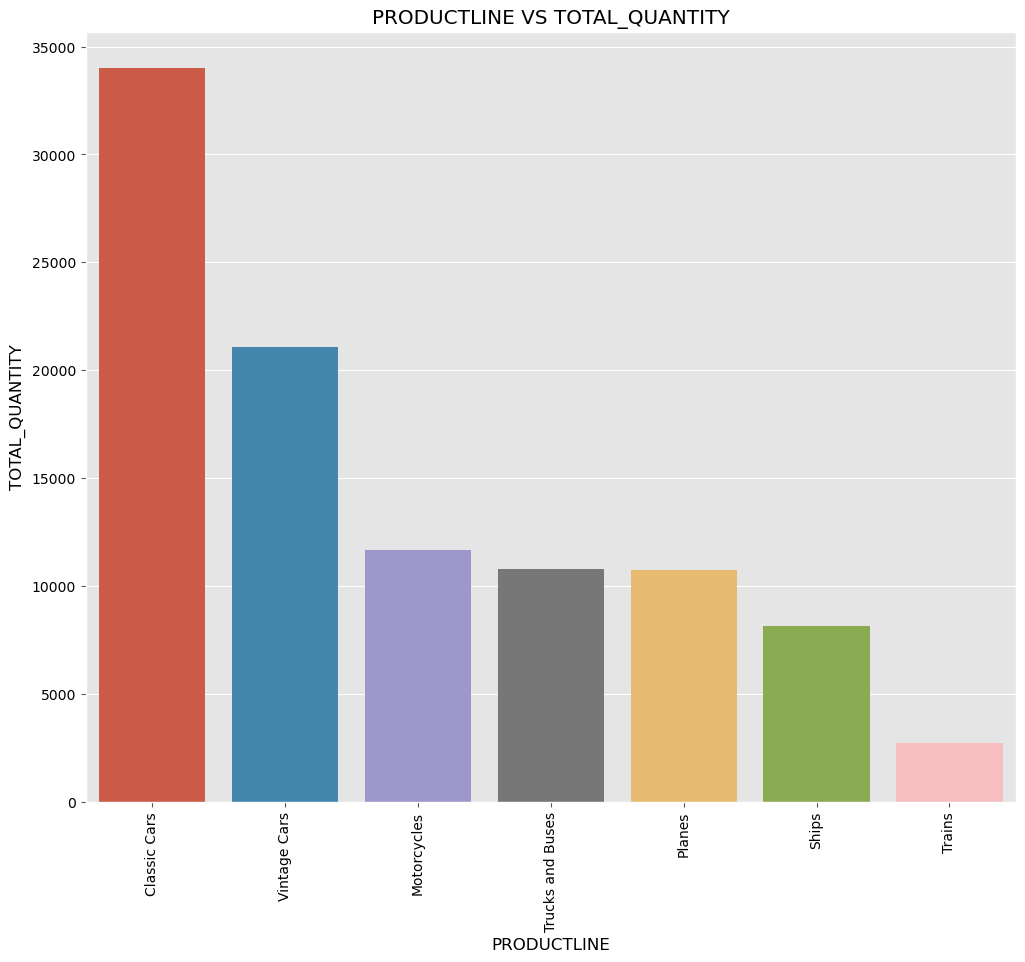

In [452]:
#VISUALISING TOTAL QUANTITY AND DIFFERENT PRODUCT CATEGORY USING BARPLOT
plt.figure(figsize=(12,10))
sns.barplot(x='PRODUCTLINE',y='TOTAL_QUANTITY',data=top_productline_quantity)
plt.xlabel('PRODUCTLINE',color='BLACK')
plt.ylabel('TOTAL_QUANTITY',color='BLACK')
plt.title('PRODUCTLINE VS TOTAL_QUANTITY',color='BLACK')
plt.xticks(color='BLACK',fontsize=10,rotation=90)
plt.yticks(color='BLACK')
plt.show()

From Productline vs Sales plot we infer that Classic Cars has highest ordered quantity as compared to other categories of product

In [453]:
#CALCULATING TOTAL QUANTITY OF DIFFERENT PRODUCTS
top_productcode_quantity=data.groupby('PRODUCTCODE')['QUANTITY'].sum().to_frame('TOTAL_QUANTITY').reset_index().sort_values(by='TOTAL_QUANTITY',ascending=False)

In [454]:
#SELECTING TOP 20 PRODUCTS
top_productcode_quantity=top_productcode_quantity.head(20)

In [455]:
#DISPLAYING TOTAL QUANTITY FOR TOP 20 PRODUCTS
top_productcode_quantity

,PRODUCTCODE,TOTAL_QUANTITY
39,S18_3232,1774
76,S24_3856,1052
50,S18_4600,1031
106,S700_4002,1029
14,S12_4473,1024
77,S24_3949,1008
91,S50_1341,999
16,S18_1097,999
29,S18_2432,998
18,S18_1342,997


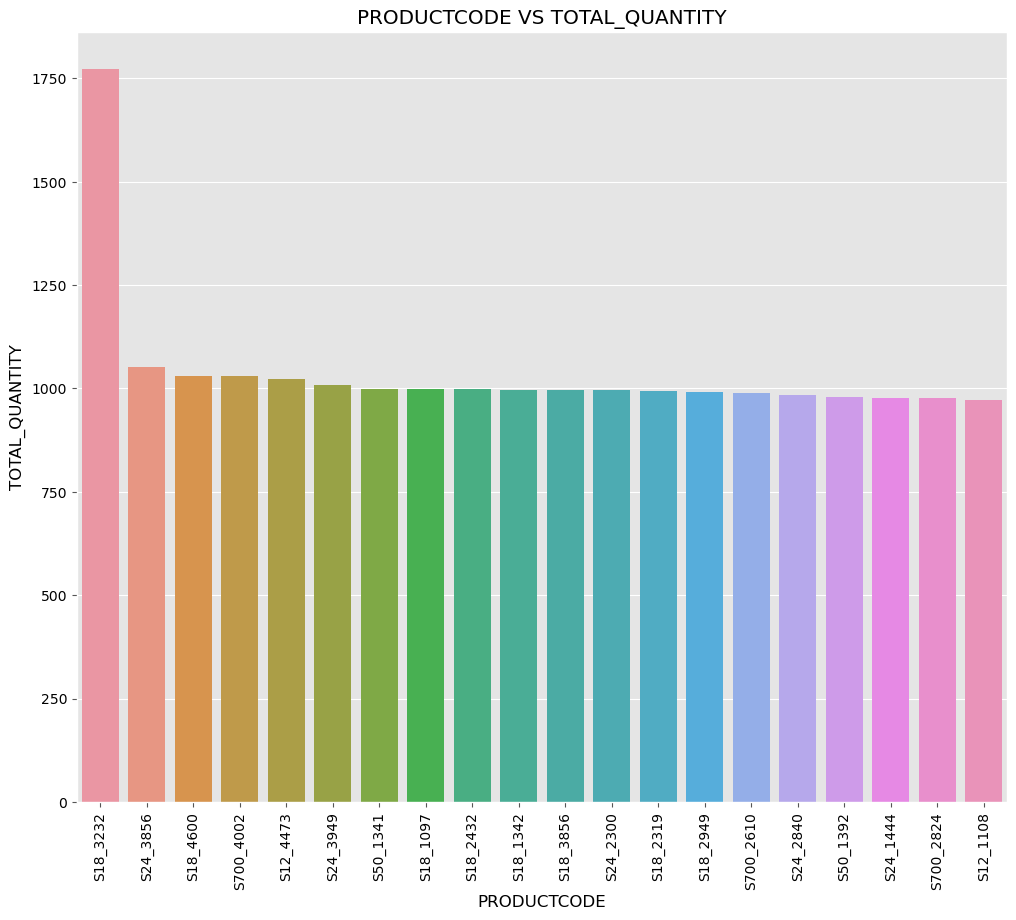

In [456]:
#VISUALISING TOTAL QUANTITY AND DIFFERENT PRODUCT CODE USING BARPLOT
plt.figure(figsize=(12,10))
sns.barplot(x='PRODUCTCODE',y='TOTAL_QUANTITY',data=top_productcode_quantity)
plt.xlabel('PRODUCTCODE',color='BLACK')
plt.ylabel('TOTAL_QUANTITY',color='BLACK')
plt.title('PRODUCTCODE VS TOTAL_QUANTITY',color='BLACK')
plt.xticks(color='BLACK',fontsize=10,rotation=90)
plt.yticks(color='BLACK')
plt.show()

From Productcode vs Quantity plot we infer that S18_3232 has highest quantity sold as compared to other product

In [457]:
#CALCULATING PERCENTAGE OF STATUS OF ORDERS 
status=data['STATUS'].value_counts(normalize=True).to_frame('PERCENTAGE').reset_index()
status.rename(columns={'index':'STATUS'},inplace=True)
status['PERCENTAGE']=status['PERCENTAGE']*100
status

,STATUS,PERCENTAGE
0,Shipped,92.702798
1,Cancelled,2.125399
2,Resolved,1.664896
3,On Hold,1.558626
4,In Process,1.452356
5,Disputed,0.495926


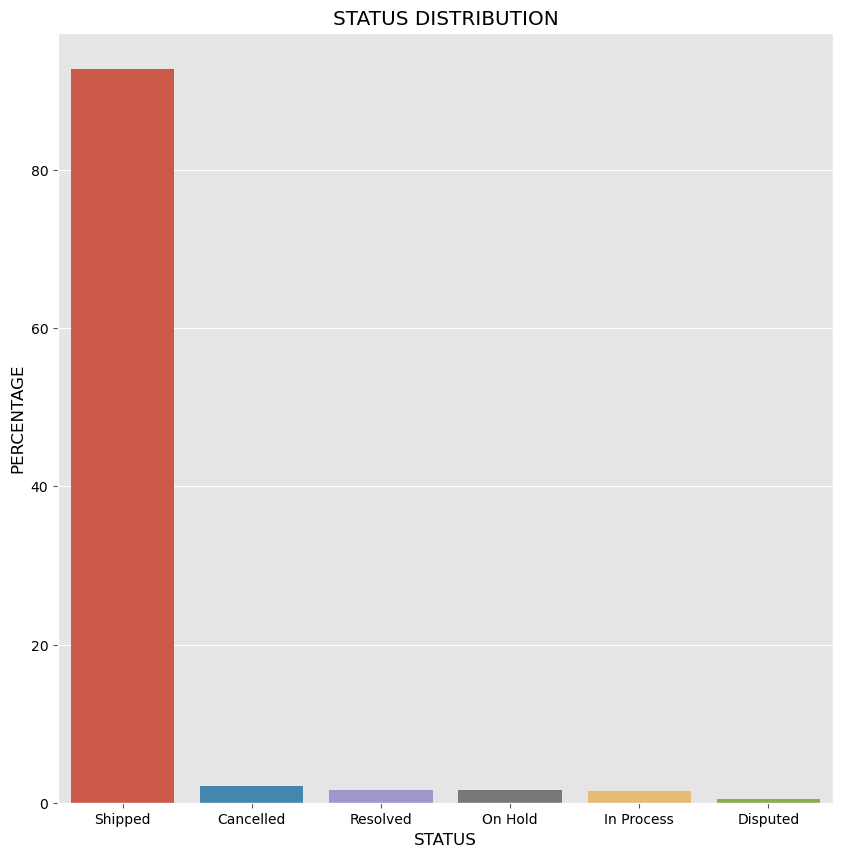

In [458]:
#VISUALISING STATUS OF ORDERS USING BARPLOT
plt.figure(figsize=(10,10))
sns.barplot(x='STATUS',y='PERCENTAGE',data=status)
plt.xlabel('STATUS',color='BLACK',fontsize='12')
plt.ylabel('PERCENTAGE',color='BLACK',fontsize='12')
plt.title('STATUS DISTRIBUTION')
plt.xticks(color='BLACK',fontsize=10)
plt.yticks(color='BLACK',fontsize=10)
plt.show()

From STATUS plot we can infer that most of the order were shipped whereas very less cancelled,on_hold,disputed,in_proccess and resolved which is a good sign

In [459]:
#PRINTING YEAR WITH NO OF MONTHS RESPECTIVELY
data.groupby('YEAR')['MONTH'].nunique()

YEAR
2003    12
2004    12
2005     5
Name: MONTH, dtype: int64

We dont have full data for year 2005

In [460]:
#CALCULATING ANNUAL REVENUE FOR DIFFERENT YEARS
annual_revenue=data.groupby('YEAR')['SALES'].sum()

In [461]:
#PRINTING ANNUAL REVENUE FOR DIFFERENT YEARS
annual_revenue

YEAR
2003    3516979.54
2004    4724162.60
2005    1791486.71
Name: SALES, dtype: float64

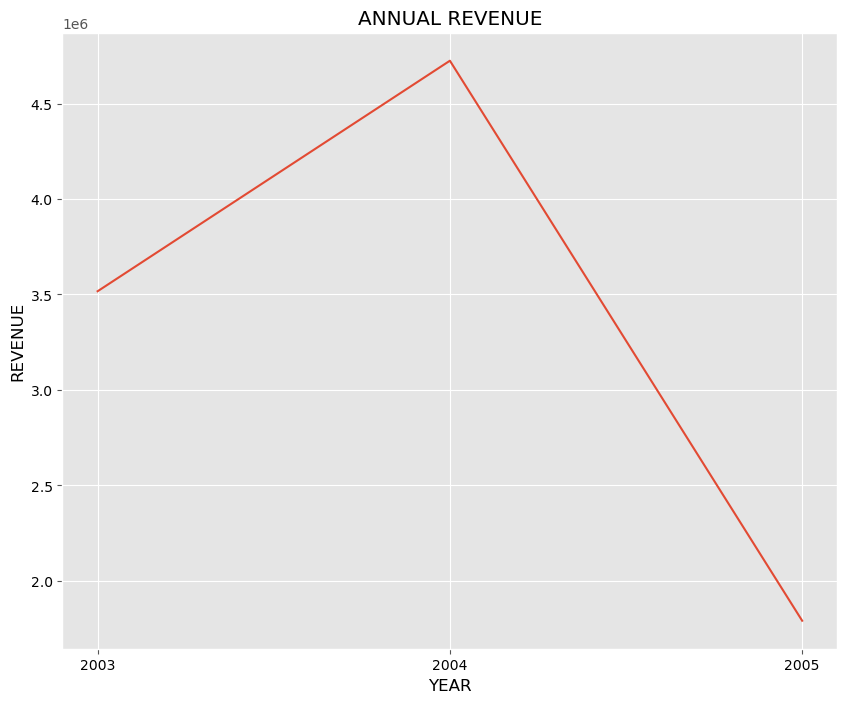

In [462]:
#VISUALISING ANNUAL REVENUE USING LINEPLOT
plt.figure(figsize=(10,8))
annual_revenue.plot()
plt.xlabel('YEAR',color='BLACK',fontsize=12)
plt.ylabel('REVENUE',color='BLACK',fontsize=12)
plt.title('ANNUAL REVENUE')
plt.yticks(color='BLACK',fontsize=10)
plt.xticks(np.arange(2003,2006,1),color='BLACK',fontsize=10)
plt.show()

We dont have the complete data for 2005, analyzing the Annual Revenue can be misleading. Instead, we can analyze Monthy Revenue.

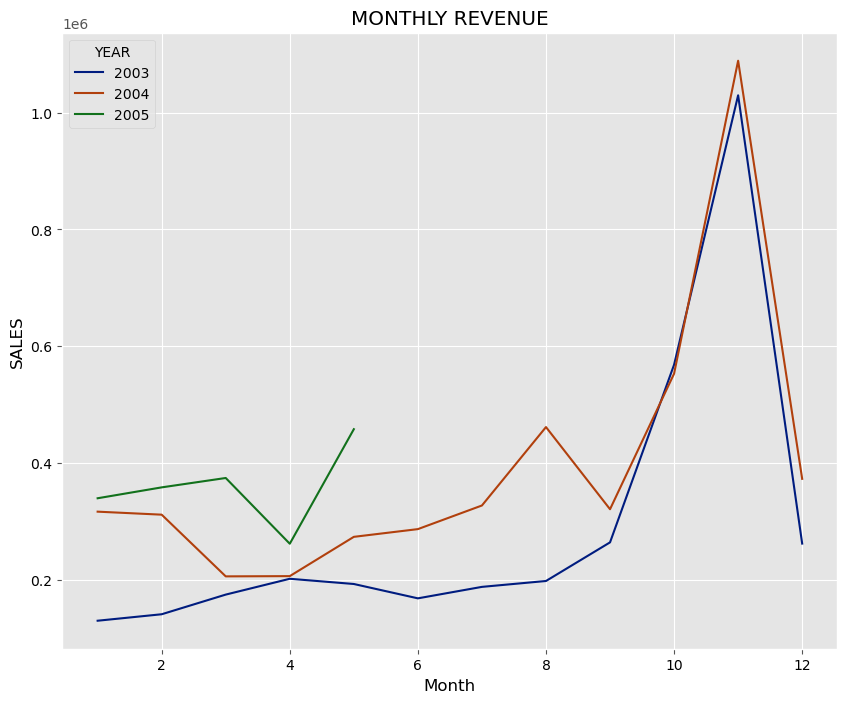

In [463]:
#CALCULATING AND VISUALISING MONTHLY REVENUE FOR DIFFERENT YEARS USING LINEPLOT
plt.figure(figsize=(10,8))
monthly_revenue = data.groupby(['YEAR','MONTH'])['SALES'].sum().to_frame('TOTAL_SALES').reset_index()
monthly_revenue
sns.lineplot(x="MONTH", y="TOTAL_SALES",hue="YEAR", data=monthly_revenue,palette='dark')
plt.xlabel('Month',color='BLACK',fontsize='12')
plt.ylabel('SALES',color='BLACK',fontsize='12')
plt.title('MONTHLY REVENUE')
plt.xticks(color='BLACK',fontsize=10)
plt.yticks(color='BLACK',fontsize=10)
plt.show()

The monthly revenue graph clearly shows that the revenue is growing especially in October and November for year 2003 and 2004. It can be due to festive season and thanks giving. We can also observe that 2005 is performing better than the other years in terms of revenue having the maximum sales in all the months(Jan - May). The reason behind this spike of sales in 2005 can be further investigated to maintain high sales in future.

In [464]:
#PRINTING MONTHLY REVENUE FOR DIFFERENT YEARS
monthly_revenue.head()

,YEAR,MONTH,TOTAL_SALES
0,2003,1,129753.60
1,2003,2,140836.19
2,2003,3,174504.90
3,2003,4,201609.55
4,2003,5,192673.11


In [465]:
#CALCULATING GROWTH RATE FOR DIFFERNT MONTHS
monthly_revenue['GROWTH_RATE']=monthly_revenue['TOTAL_SALES'].pct_change()

In [466]:
#PRINTING GROWTH RATE FOR DIFFERENT MONTHS 
monthly_revenue.head()

,YEAR,MONTH,TOTAL_SALES,GROWTH_RATE
0,2003,1,129753.60,NaN
1,2003,2,140836.19,0.085413
2,2003,3,174504.90,0.239063
3,2003,4,201609.55,0.155323
4,2003,5,192673.11,-0.044325


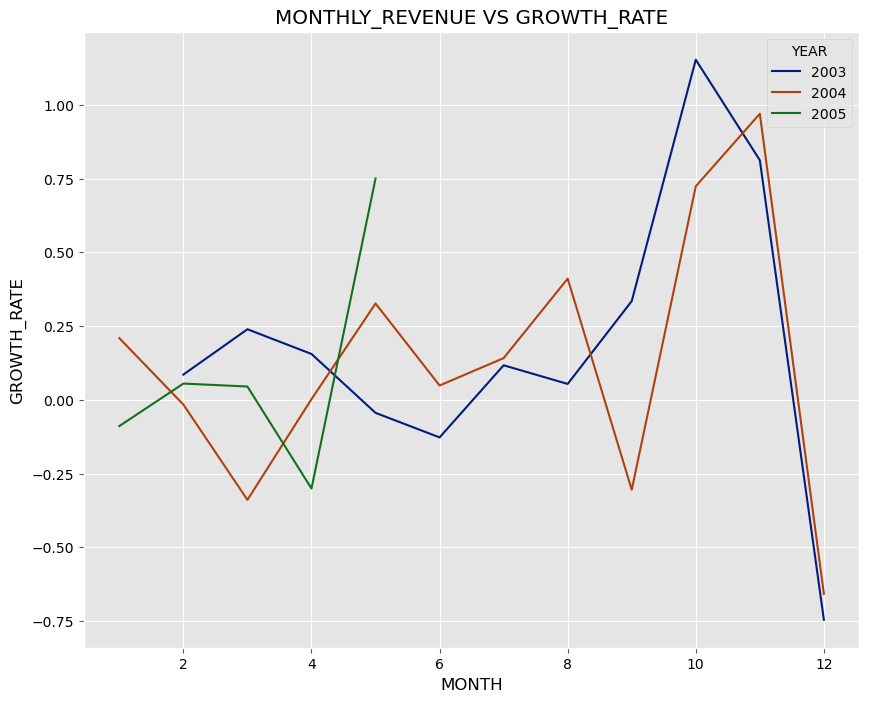

In [467]:
#VISUALISING GROWTH RATE FOR DIFFERENT MONTHS USING LINEPLOT
plt.figure(figsize=(10,8))
sns.lineplot(x="MONTH", y="GROWTH_RATE",hue="YEAR", data=monthly_revenue,palette='dark')
plt.xlabel('MONTH',color='BLACK',fontsize='12')
plt.ylabel('GROWTH_RATE',color='BLACK',fontsize='12')
plt.title('MONTHLY_REVENUE VS GROWTH_RATE')
plt.xticks(color='BLACK',fontsize=10)
plt.yticks(color='BLACK',fontsize=10)
plt.show()

There is high growth rate from Apr 2005 to May 2005 as compared to 2003 and 2004 which can be further investigated to get more insights regarding sales.

In [468]:
#CALCULATING AVERAGE REVENUE PER MONTH FOR DIFFERENT YEARS
average_revenue = data.groupby(['YEAR','MONTH'])['SALES'].mean().to_frame('TOTAL_SALES').reset_index()
average_revenue.head()

,YEAR,MONTH,TOTAL_SALES
0,2003,1,3327.015385
1,2003,2,3435.029024
2,2003,3,3490.098000
3,2003,4,3476.026724
4,2003,5,3321.950172


<Figure size 1000x800 with 0 Axes>

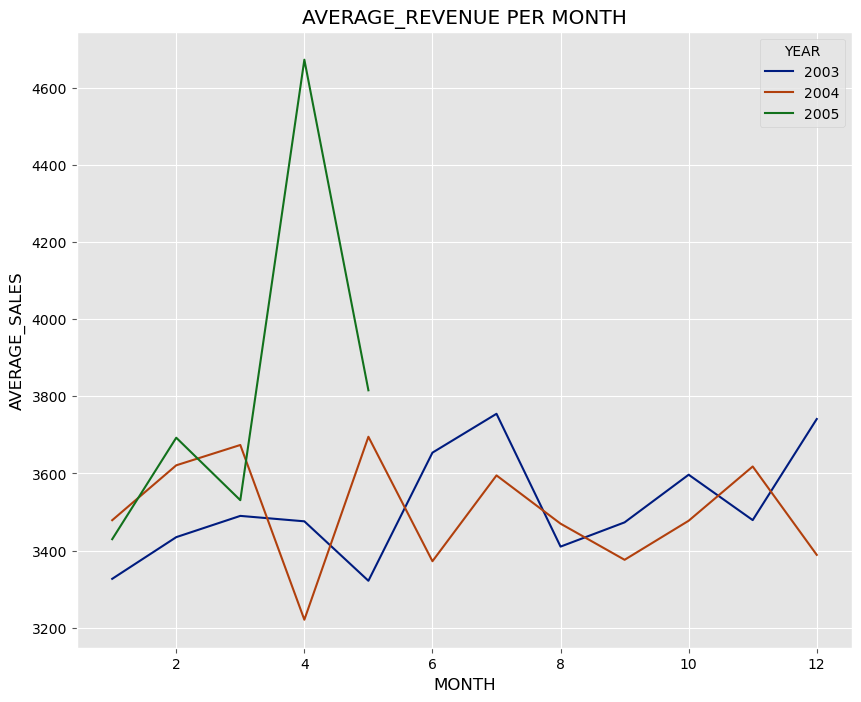

In [469]:
#VISUALISNG AVERAGE REVENUE FOR DIFFERENT MONTHS USING LINEPLOT
plt.figure(figsize=(10,8))
plt.figure(figsize=(10,8))
sns.lineplot(x="MONTH", y="TOTAL_SALES",hue="YEAR", data=average_revenue,palette='dark')
plt.xlabel('MONTH',color='BLACK',fontsize='12')
plt.ylabel('AVERAGE_SALES',color='BLACK',fontsize='12')
plt.title('AVERAGE_REVENUE PER MONTH')
plt.xticks(color='BLACK',fontsize=10)
plt.yticks(color='BLACK',fontsize=10)
plt.show()

In [470]:
#GENERATING NEW COLUMN NAMED AS YEAR-MONTH
hyphen='-'
data['YEAR_MONTH'] = data['YEAR'].map(str)+hyphen+data['MONTH'].map(str).map(lambda x: x.rjust(2,'0'))
data['YEAR_MONTH']

0       2003-02
1       2003-05
2       2003-07
3       2003-08
4       2003-10
         ...   
2818    2004-12
2819    2005-01
2820    2005-03
2821    2005-03
2822    2005-05
Name: YEAR_MONTH, Length: 2823, dtype: object

In [471]:
#CALCULATING ACTIVE CUSTOMER PER MONTH FOR DIFFERENT MONTHS
active_customer=data.groupby('YEAR_MONTH')['CUSTOMERNAME'].nunique().to_frame('NO_OF_ACTIVE_CUSTOMER').reset_index()
active_customer

,YEAR_MONTH,NO_OF_ACTIVE_CUSTOMER
0,2003-01,5
1,2003-02,3
2,2003-03,6
3,2003-04,7
4,2003-05,6
5,2003-06,5
6,2003-07,6
7,2003-08,5
8,2003-09,8
9,2003-10,16


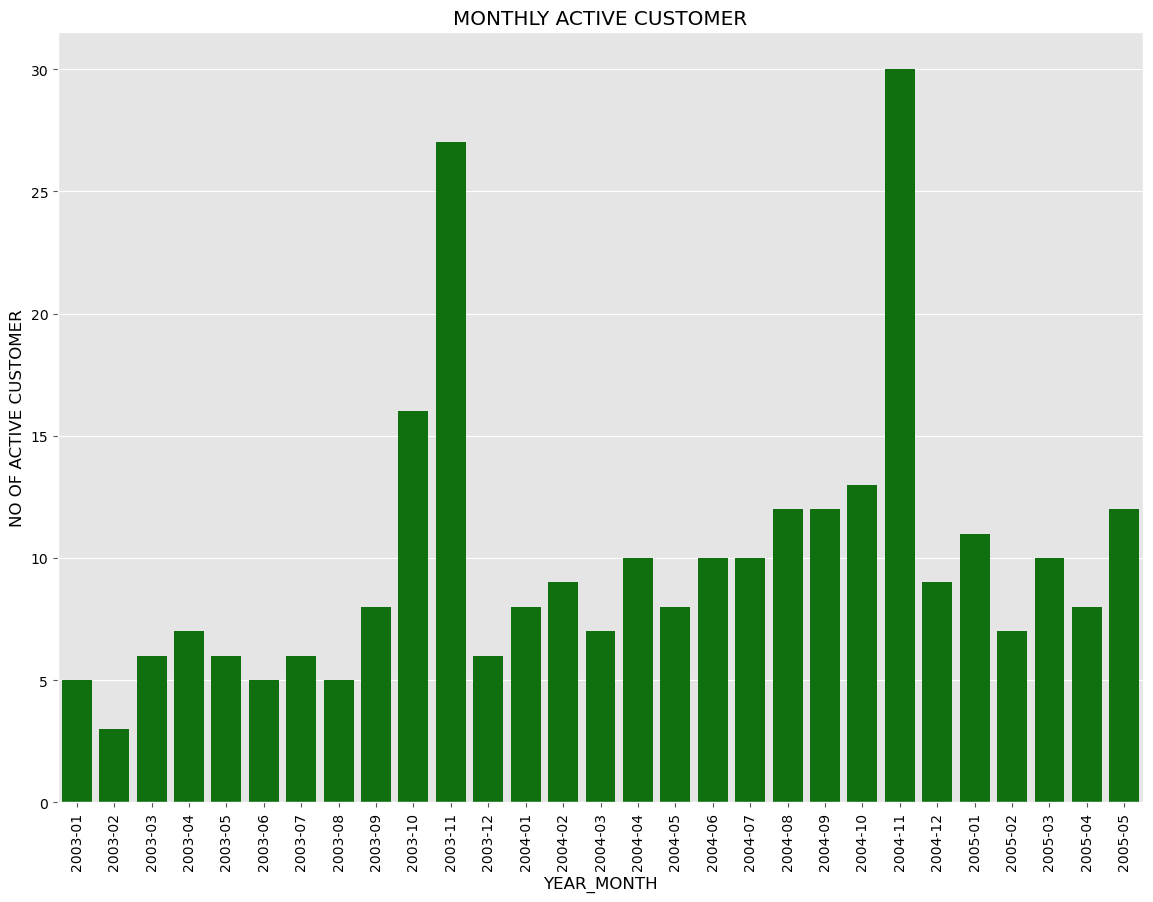

In [472]:
#VISUALISING ACTIVE CUSTOMERS USING BARPLOT 
plt.figure(figsize=(14,10))
sns.barplot(x='YEAR_MONTH',y='NO_OF_ACTIVE_CUSTOMER',data=active_customer,color='GREEN',)
plt.title('MONTHLY ACTIVE CUSTOMER')
plt.xlabel('YEAR_MONTH',color='BLACK',fontsize=12)
plt.ylabel('NO OF ACTIVE CUSTOMER',color='BLACK',fontsize=12)
plt.xticks(color='BLACK',fontsize=10,rotation=90)
plt.yticks(color='BLACK',fontsize=10)
plt.show()

From above graph we can infer that customers are highly active during the months of November and October. The number of active customers increased from 2003 to 2004 which indicates that the company is successful in retention/acquisition of old/new customers.

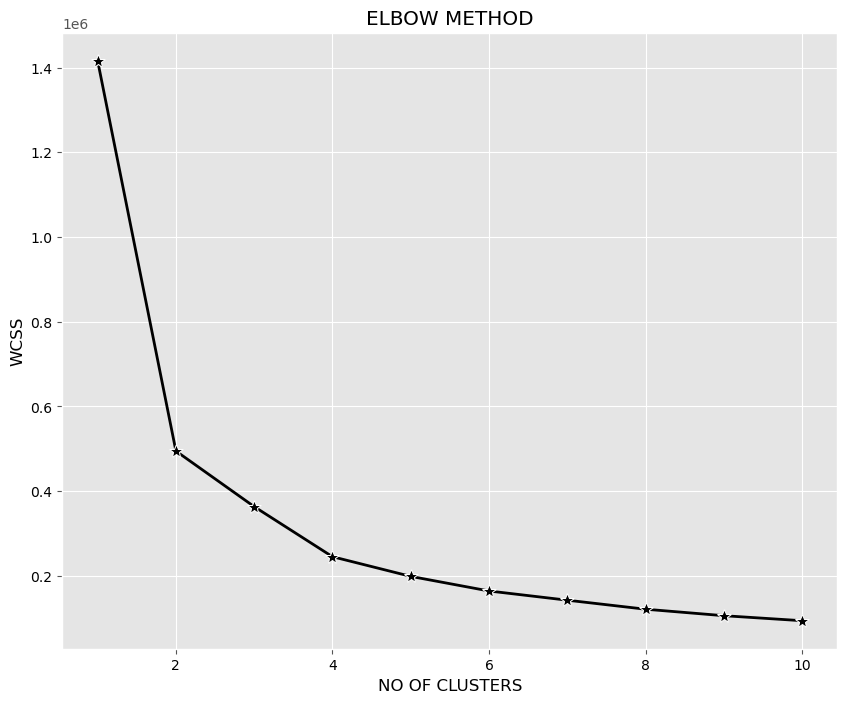

In [473]:
#GENERATING CORRECT NO OF CLUSTERS USING ELBOW METHOD
price_quantity=data.loc[:,['PRICE','QUANTITY']].values
wcss=[]
for i in range(1,11):
    cluster=KMeans(n_clusters=i,init='k-means++',random_state=32)
    cluster.fit(price_quantity)
    wcss.append(cluster.inertia_)
plt.figure(figsize=(10,8))
sns.lineplot(x=range(1,11),y=wcss,color='BLACK',marker='*',markersize=10,linewidth=2)
plt.title('ELBOW METHOD')
plt.xticks(color='BLACK',fontsize=10)
plt.yticks(color='BLACK',fontsize=10)
plt.xlabel('NO OF CLUSTERS',color='BLACK',fontsize=12)
plt.ylabel('WCSS',color='BLACK',fontsize=12)
plt.show()

In [474]:
#CALCULATING DIFFERENT CLUSTERS USING KMEANS ALGORITHM
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=32)
kmeans.fit(price_quantity)
labels=kmeans.predict(price_quantity)

In [475]:
#PRINTING VALUES OF CLUSTERS
labels

array([2, 3, 0, ..., 0, 3, 3])

In [476]:
#PRINTING COORDINATES FOR CENTROIDS OF DIFFERENT CLUSTERS
centers=kmeans.cluster_centers_
centers

array([[97.78512048, 43.90361446],
       [46.6684633 , 34.94495413],
       [97.83631111, 27.10777778],
       [70.93803653, 34.99847793]])

In [477]:
price_quan=data.loc[:,['PRICE','QUANTITY']]
price_quan['LABEL']=labels
price_quan

,PRICE,QUANTITY,LABEL
0,95.70,30,2
1,81.35,34,3
2,94.74,41,0
3,83.26,45,0
4,100.00,49,0
...,...,...,...
2818,100.00,20,2
2819,100.00,29,2
2820,100.00,43,0
2821,62.24,34,3


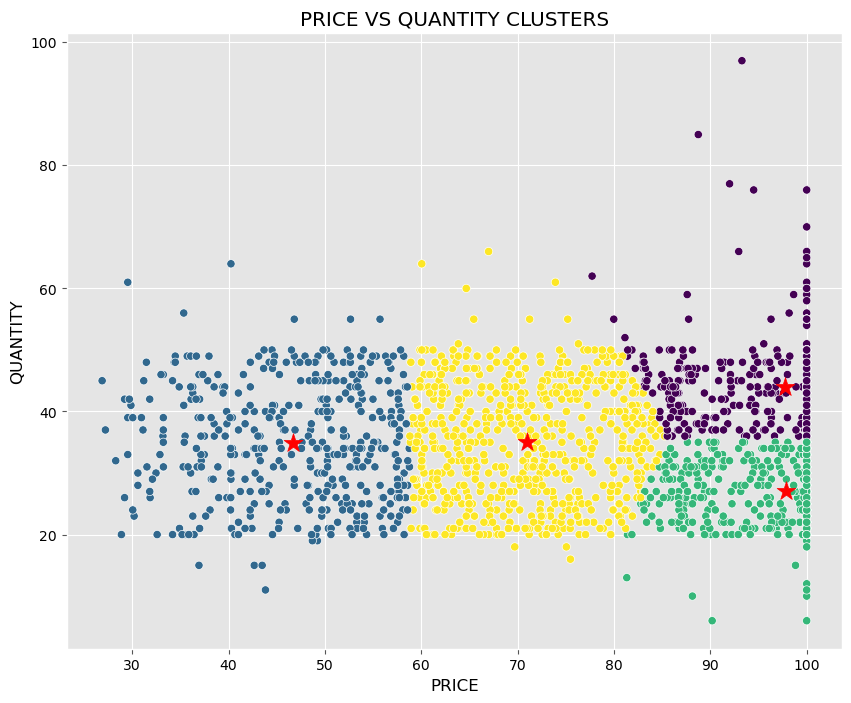

In [478]:
#VISUALING DIFFERENT CLUSTERS OF PRICE AND QUANTITY USING SCATTER PLOT
plt.figure(figsize=(10,8))
sns.scatterplot(x=price_quantity[:,0],y=price_quantity[:,1],data=price_quantity,c=labels)
sns.color_palette('dark',as_cmap='dark')
plt.scatter(centers[:,0],centers[:,1],c='RED',s=200,marker='*')
plt.title('PRICE VS QUANTITY CLUSTERS')
plt.xticks(color='BLACK',fontsize=10)
plt.yticks(color='BLACK',fontsize=10)
plt.xlabel('PRICE',color='BLACK',fontsize=12)
plt.ylabel('QUANTITY',color='BLACK',fontsize=12)
plt.show()

In [479]:
#CHANGING VALUES OF DEALSIZE TO NUMERIC VALUES
data['DEALSIZE'].replace({'Small':1,'Medium':2,'Large':3},inplace=True)

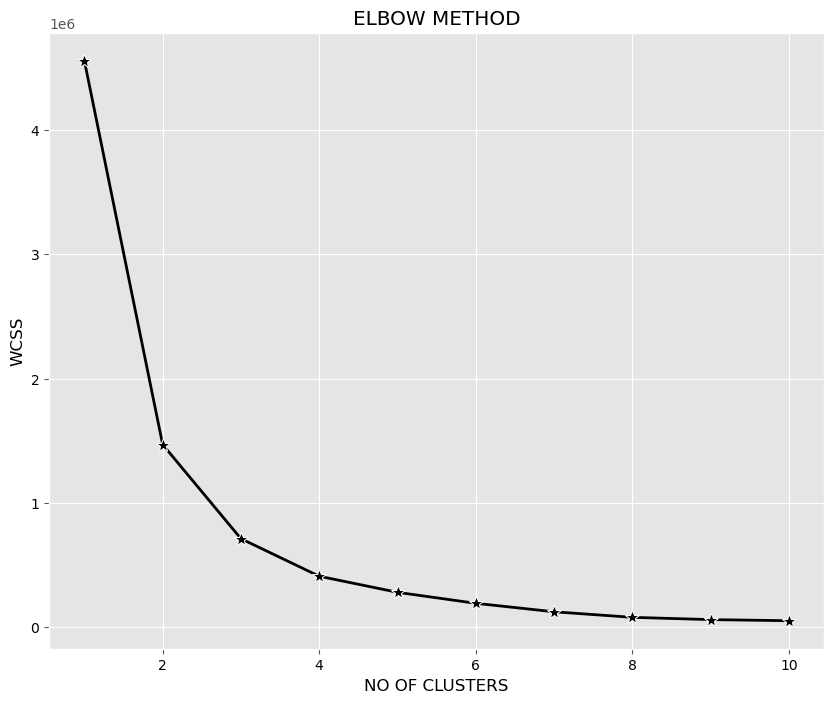

In [480]:
#FINIDNG CORRECT NO OF CLUSTERS USING ELBOW METHOD
dealsize_msrp=data.loc[:,['DEALSIZE','MSRP']].values
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=32)
    kmeans.fit(dealsize_msrp)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,8))
sns.lineplot(x=range(1,11),y=wcss,color='BLACK',marker='*',markersize=10,linewidth=2)
plt.title('ELBOW METHOD')
plt.xticks(color='BLACK',fontsize=10)
plt.yticks(color='BLACK',fontsize=10)
plt.xlabel('NO OF CLUSTERS',color='BLACK',fontsize=12)
plt.ylabel('WCSS',color='BLACK',fontsize=12)
plt.show()

In [481]:
#GENERATING LABELS FOR CLUSTERS USING KMEANS ALGORITHM
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=32)
labels=kmeans.fit_predict(dealsize_msrp)
labels

array([3, 3, 3, ..., 0, 0, 0])

In [482]:
#PRINTING COORDINATES OF CENTORIDS OF DIFFERENT CLUSTERS
centers=kmeans.cluster_centers_
centers

array([[  1.18878719,  57.40961098],
       [  1.86282051, 129.86282051],
       [  2.23239437, 179.99647887],
       [  1.57627119,  92.35254237]])

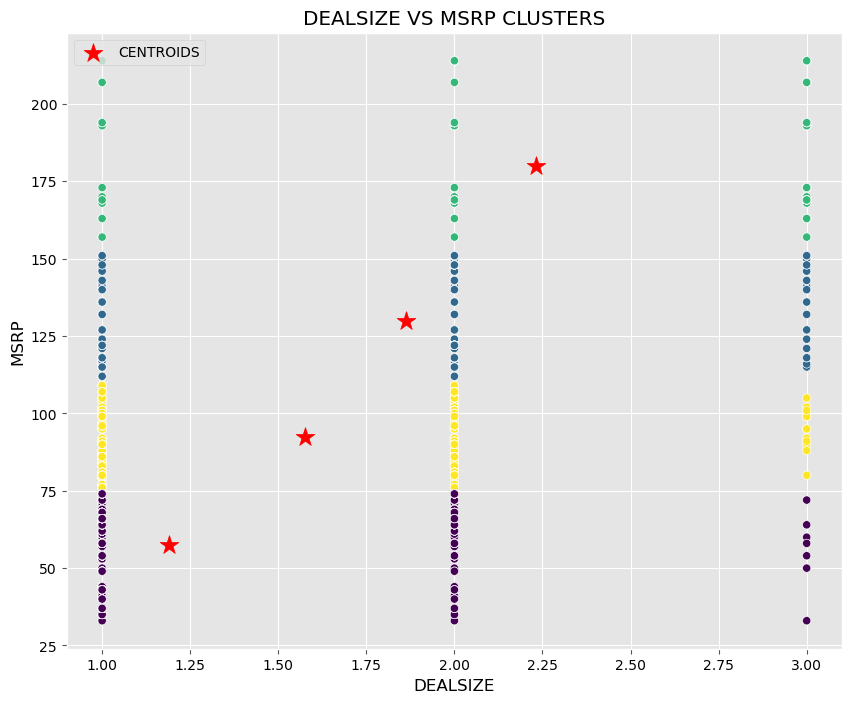

In [483]:
#VISUALISING DEALSIZE AND MSRP CLUSTERS USING SCATTER PLOT
plt.figure(figsize=(10,8))
sns.scatterplot(x=dealsize_msrp[:,0],y=dealsize_msrp[:,1],data=dealsize_msrp,c=labels)
sns.color_palette('deep',as_cmap=True)
plt.scatter(centers[:,0],centers[:,1],c='RED',s=200,marker='*',label='CENTROIDS')
plt.title('DEALSIZE VS MSRP CLUSTERS')
plt.xticks(color='BLACK',fontsize=10)
plt.yticks(color='BLACK',fontsize=10)
plt.xlabel('DEALSIZE',color='BLACK',fontsize=12)
plt.ylabel('MSRP',color='BLACK',fontsize=12)
plt.legend()
plt.show()

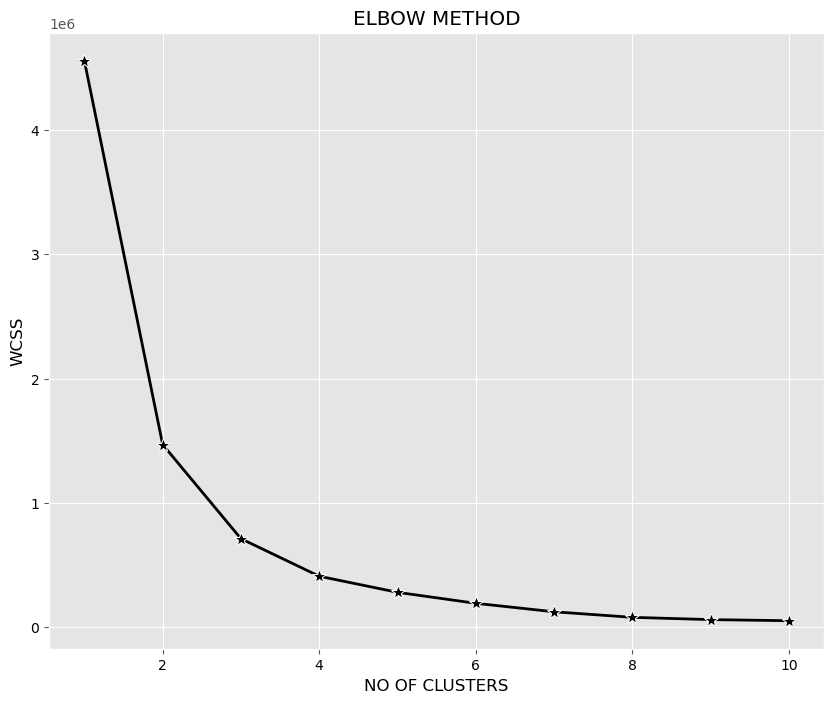

In [484]:
#FINDING CORRECT NO OF CLUSTERS UDING ELBOW METHOD
df=data.loc[:,['QUANTITY','MSRP','DEALSIZE']].values
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=32)
    kmeans.fit(dealsize_msrp)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,8))
sns.lineplot(x=range(1,11),y=wcss,color='BLACK',marker='*',markersize=10,linewidth=2)
plt.title('ELBOW METHOD')
plt.xticks(color='BLACK',fontsize=10)
plt.yticks(color='BLACK',fontsize=10)
plt.xlabel('NO OF CLUSTERS',color='BLACK',fontsize=12)
plt.ylabel('WCSS',color='BLACK',fontsize=12)
plt.show()

In [485]:
#GENERATING LABELS FOR DIFFERENT CLUSTERS UDING KMEANS ALGORITHM
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=32)
labels=kmeans.fit_predict(df)
labels

array([2, 2, 2, ..., 0, 0, 0])

In [486]:
#PRINTING COORDINATES OF CENTROIDS FOR DIFFERENT CLUSTERS
centers=kmeans.cluster_centers_
centers

array([[ 34.89588101,  57.40961098,   1.18878719],
       [ 35.70512821, 129.86282051,   1.86282051],
       [ 34.83954802,  92.35254237,   1.57627119],
       [ 34.80633803, 179.99647887,   2.23239437]])

In [487]:
clusters=kmeans.predict(df)
data['CLUSTERS']=labels

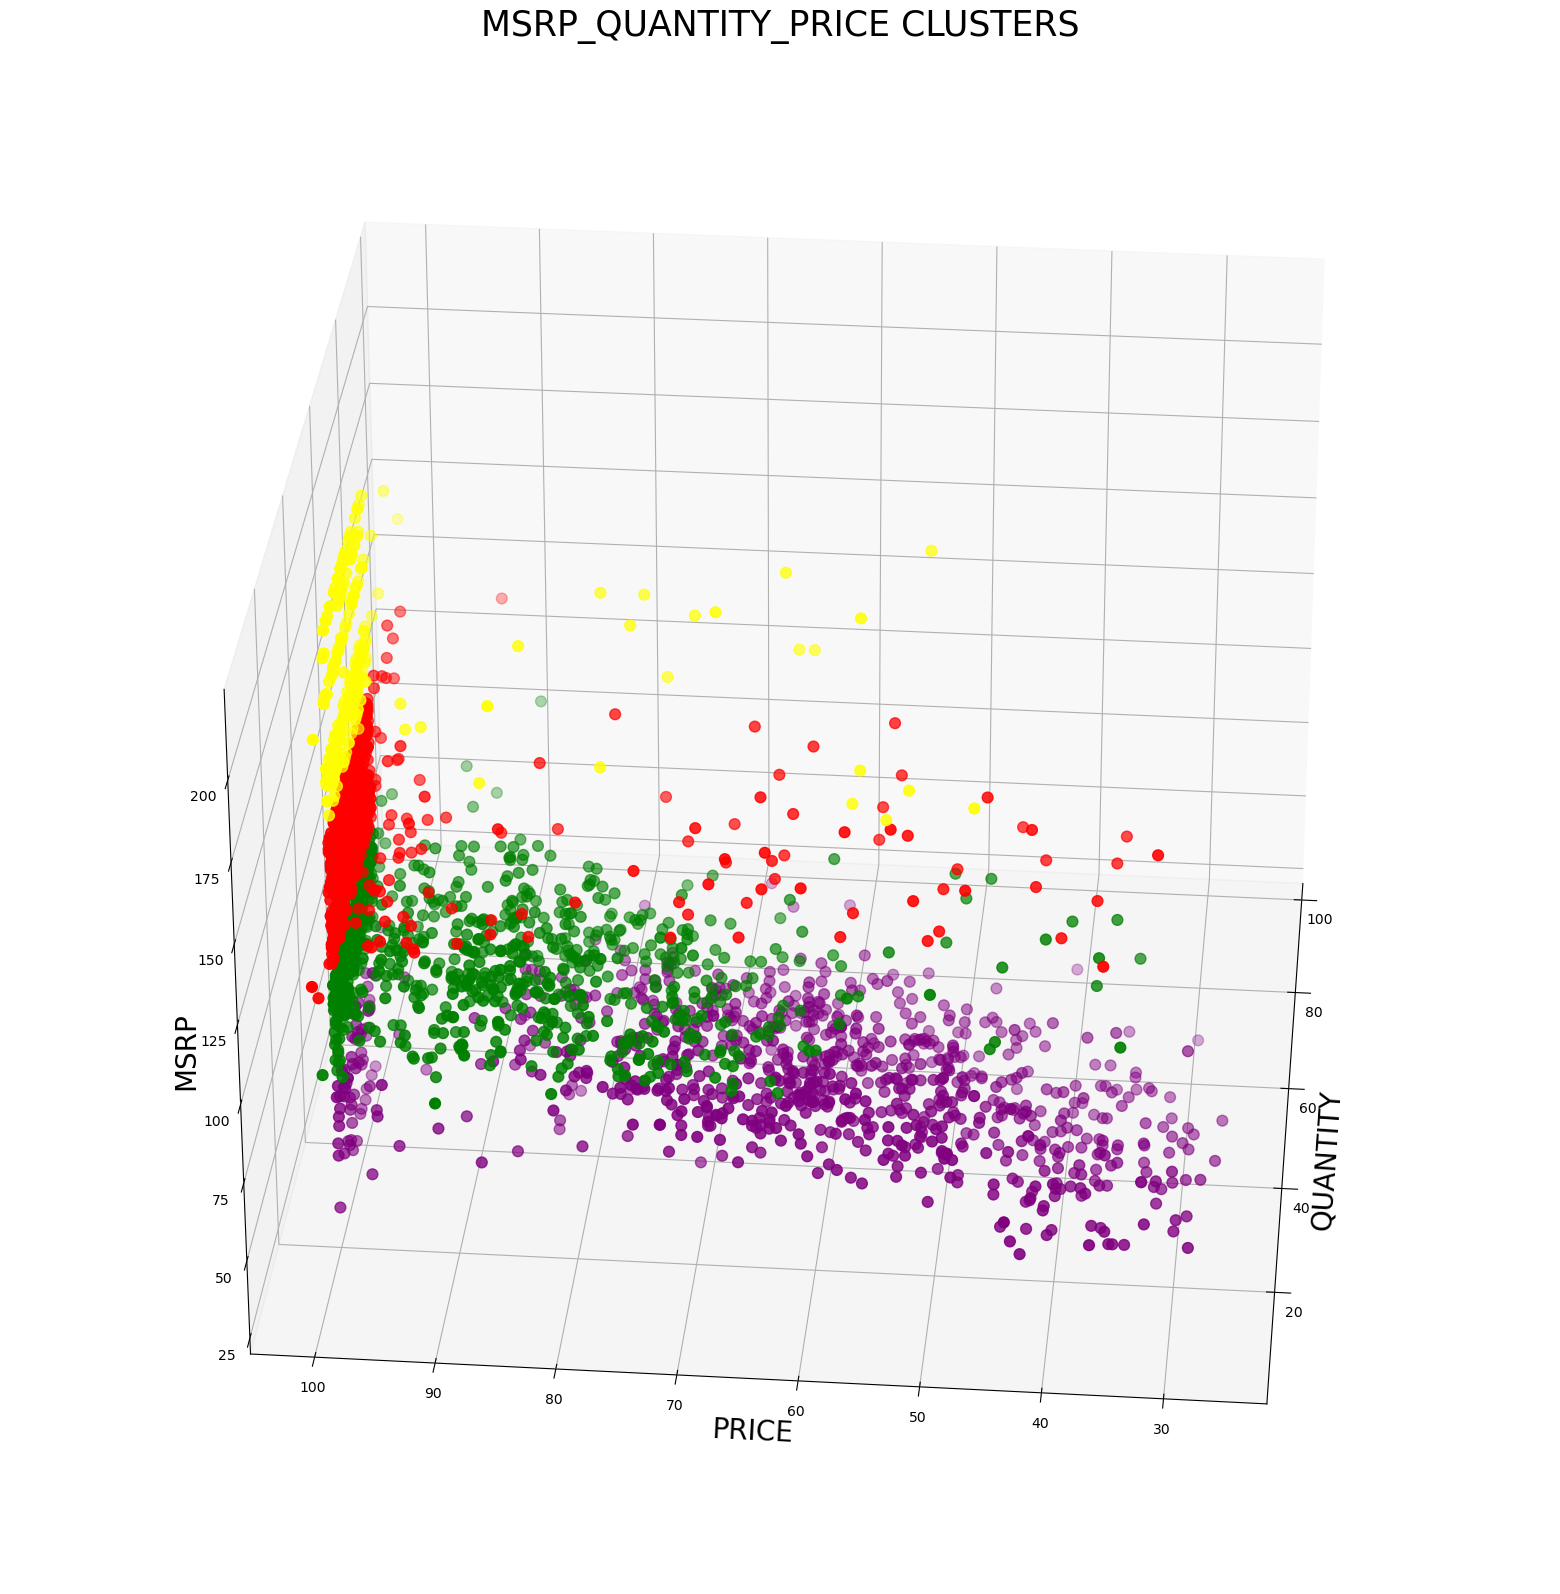

In [490]:
#VISUALISING CLUSTERS OF MSRP,QUANTITY AND PRICE IN 3D USING SCATTER PLOT
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('default')
fig=plt.figure(figsize=(50,20),facecolor=None)
ax=fig.add_subplot(111,projection='3d')
ax.scatter(data['QUANTITY'][data.CLUSTERS == 0], data["PRICE"][data.CLUSTERS == 0], data["MSRP"][data.CLUSTERS == 0], c='purple', s=60)
ax.scatter(data['QUANTITY'][data.CLUSTERS == 1], data["PRICE"][data.CLUSTERS == 1], data["MSRP"][data.CLUSTERS== 1], c='red', s=60)
ax.scatter(data['QUANTITY'][data.CLUSTERS == 2], data["PRICE"][data.CLUSTERS == 2], data["MSRP"][data.CLUSTERS == 2], c='green', s=60)
ax.scatter(data['QUANTITY'][data.CLUSTERS == 3], data["PRICE"][data.CLUSTERS == 3], data["MSRP"][data.CLUSTERS == 3], c='yellow', s=60)
ax.view_init(30,185)
plt.xlabel("QUANTITY",color='BLACK',fontsize=20,rotation=90)
plt.ylabel("PRICE",color='BLACK',fontsize=20,rotation=90)
ax.set_zlabel("MSRP",color='BLACK',fontsize=20,rotation=90)
plt.xticks(color='BLACK',fontsize=10)
plt.yticks(color='BLACK',fontsize=10)
plt.title('MSRP_QUANTITY_PRICE CLUSTERS',fontsize=25)
plt.show()
